Resources: 
1- Google Drive link which contanis my dataset: https://drive.google.com/drive/folders/1e3tEXfWA23EQt7DLOx0DpmG5UmaeTCb4?usp=sharing 

2- pix2pix repo which I have worked on : https://github.com/aladdinpersson/Machine-Learning-Collection/tree/master/ML/Pytorch/GANs/Pix2Pix

3- youtube video ⁉
https://www.youtube.com/watch?v=SuddDSqGRzg&list=PLhhyoLH6IjfxeoooqP9rhU3HJIAVAJ3Vz&index=28


# Load Data

In [ ]:
! pip install kaggle
! mkdir ~/.kaggle


In [ ]:
! cp kaggle.json ~/.kaggle/


In [ ]:
! chmod 600 ~/.kaggle/kaggle.json


In [ ]:
! kaggle datasets download hsankesara/flickr-image-dataset


100% 8.16G/8.16G [03:00<00:00, 36.8MB/s]
100% 8.16G/8.16G [03:00<00:00, 48.5MB/s]


In [ ]:
!unzip flickr-image-dataset.zip 

Streaming output truncated to the last 5000 lines.
  inflating: flickr30k_images/flickr30k_images/flickr30k_images/5354911151.jpg  
  inflating: flickr30k_images/flickr30k_images/flickr30k_images/535529555.jpg  
  inflating: flickr30k_images/flickr30k_images/flickr30k_images/5356236664.jpg  
  inflating: flickr30k_images/flickr30k_images/flickr30k_images/5356318668.jpg  
  inflating: flickr30k_images/flickr30k_images/flickr30k_images/535830521.jpg  
  inflating: flickr30k_images/flickr30k_images/flickr30k_images/5359437945.jpg  
  inflating: flickr30k_images/flickr30k_images/flickr30k_images/5361355399.jpg  
  inflating: flickr30k_images/flickr30k_images/flickr30k_images/53614287.jpg  
  inflating: flickr30k_images/flickr30k_images/flickr30k_images/536147209.jpg  
  inflating: flickr30k_images/flickr30k_images/flickr30k_images/5361551308.jpg  
  inflating: flickr30k_images/flickr30k_images/flickr30k_images/536156200.jpg  
  inflating: flickr30k_images/flickr30k_images/flickr30k_images/

# Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
drive.mount("/content/gdrive", force_remount=True)


Mounted at /content/gdrive


* take 2000 images and saved them in Drive

In [ ]:
cd /content/flickr30k_images/flickr30k_images

/content/flickr30k_images/flickr30k_images


In [ ]:
ls

1000092795.jpg  2695974995.jpg  3631344685.jpg  4817954318.jpg
10002456.jpg    2696045361.jpg  363140724.jpg   4818210621.jpg
1000268201.jpg  2696060728.jpg  3631474374.jpg  4818265780.jpg
1000344755.jpg  2696129516.jpg  3631530817.jpg  481827288.jpg
1000366164.jpg  2696200521.jpg  3631671718.jpg  4818306972.jpg
1000523639.jpg  269630255.jpg   3631810528.jpg  4818336363.jpg
1000919630.jpg  2696394827.jpg  3631839768.jpg  4818381346.jpg
10010052.jpg    269650644.jpg   3631986552.jpg  4818385876.jpg
1001465944.jpg  2696636252.jpg  3632047678.jpg  4818426478.jpg
1001545525.jpg  2696866120.jpg  3632197966.jpg  4818429638.jpg
1001573224.jpg  2696951725.jpg  3632225464.jpg  4818583045.jpg
1001633352.jpg  2697058141.jpg  3632258003.jpg  4818672276.jpg
1001773457.jpg  2697822530.jpg  3632572264.jpg  4818675580.jpg
1001896054.jpg  2697909987.jpg  363269016.jpg   4818675994.jpg
100197432.jpg   2698119128.jpg  3632842482.jpg  4818678636.jpg
100207720.jpg   2698197294.jpg  3633169600.jpg  48187439

In [ ]:
import glob
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
i=0
original_images = []
for img_path in glob.glob('*.jpg'):
    #print(len(images))
    original_images.append(mpimg.imread((img_path))) 
    i+=1
    if (i==2000):
      break

In [ ]:
print(len(original_images))

2000


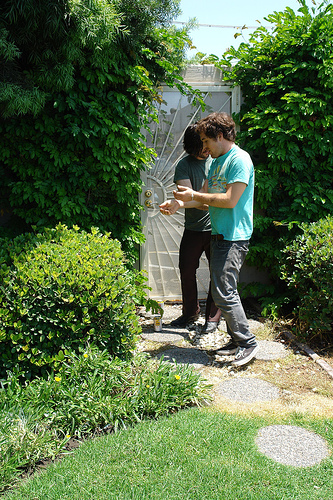

In [ ]:
x= cv2.imread ('1000092795.jpg')
cv2_imshow(x)

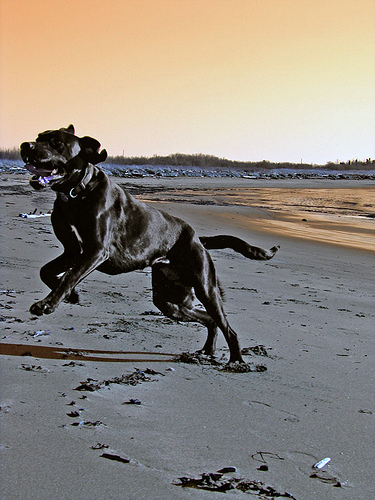

In [ ]:
from google.colab.patches import cv2_imshow
cv2_imshow(original_images[5])

In [ ]:
import cv2 
import numpy as np

count =0
for i in range (len(original_images)):
  x=(original_images[i])
  cv2.imwrite('/content/gdrive/MyDrive/GANs/original/'+str(count)+'.png',x) 
  count +=1

* Convert to CVD simulation

In [ ]:
!pip install daltonize


In [ ]:
import cv2
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
from daltonize import daltonize

simulated =[]
for i in range (len (original_images)):
  simul_rgb_t = daltonize.simulate(original_images[i],'t')
  simulated.append(simul_rgb_t)
#cv2_imshow (simulated[0])

In [ ]:
print(len(simulated))

2000


In [ ]:
import cv2 
import numpy as np

count =0
for i in range (len(simulated)):
  x=np.float64(simulated[i])
  cv2.imwrite('/content/gdrive/MyDrive/GANs/cvd/'+str(count)+'.png',x) 
  count +=1

* Model

* Discriminator 

In [ ]:
import torch
import torch.nn as nn

class CNNBlock(nn.Module):
    def __init__(self, in_channels, out_channels, stride):
        super(CNNBlock, self).__init__()
        self.conv = nn.Sequential(
            nn.Conv2d(
                in_channels, out_channels, 4, stride, 1, bias=False, padding_mode="reflect"
            ),
            nn.BatchNorm2d(out_channels),
            nn.LeakyReLU(0.2),
        )

    def forward(self, x):
        return self.conv(x)


class Discriminator(nn.Module):
    def __init__(self, in_channels=3, features=[64, 128, 256, 512]):
        super().__init__()
        self.initial = nn.Sequential(
            nn.Conv2d(
                in_channels * 2,
                features[0],
                kernel_size=4,
                stride=2,
                padding=1,
                padding_mode="reflect",
            ),
            nn.LeakyReLU(0.2),
        )

        layers = []
        in_channels = features[0]
        for feature in features[1:]:
            layers.append(
                CNNBlock(in_channels, feature, stride=1 if feature == features[-1] else 2),
            )
            in_channels = feature

        layers.append(
            nn.Conv2d(
                in_channels, 1, kernel_size=4, stride=1, padding=1, padding_mode="reflect"
            ),
        )

        self.model = nn.Sequential(*layers)

    def forward(self, x, y):
        x = torch.cat([x, y], dim=1)
        x = self.initial(x)
        x = self.model(x)
        return x


def test():
    x = torch.randn((1, 3, 256, 256))
    y = torch.randn((1, 3, 256, 256))
    model = Discriminator(in_channels=3)
    preds = model(x, y)
    print(model)
    print(preds.shape)


if __name__ == "__main__":
    test()

Discriminator(
  (initial): Sequential(
    (0): Conv2d(6, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), padding_mode=reflect)
    (1): LeakyReLU(negative_slope=0.2)
  )
  (model): Sequential(
    (0): CNNBlock(
      (conv): Sequential(
        (0): Conv2d(64, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False, padding_mode=reflect)
        (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): LeakyReLU(negative_slope=0.2)
      )
    )
    (1): CNNBlock(
      (conv): Sequential(
        (0): Conv2d(128, 256, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False, padding_mode=reflect)
        (1): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): LeakyReLU(negative_slope=0.2)
      )
    )
    (2): CNNBlock(
      (conv): Sequential(
        (0): Conv2d(256, 512, kernel_size=(4, 4), stride=(1, 1), padding=(1, 1), bias=False, padding_mode=reflect)
        (1): Batc

* Generator 

In [ ]:
import torch
import torch.nn as nn

class Block(nn.Module):
    def __init__(self, in_channels, out_channels, down=True, act="relu", use_dropout=False):
        super(Block, self).__init__()
        self.conv = nn.Sequential(
            nn.Conv2d(in_channels, out_channels, 4, 2, 1, bias=False, padding_mode="reflect")
            if down
            else nn.ConvTranspose2d(in_channels, out_channels, 4, 2, 1, bias=False),
            nn.BatchNorm2d(out_channels),
            nn.ReLU() if act == "relu" else nn.LeakyReLU(0.2),
        )

        self.use_dropout = use_dropout
        self.dropout = nn.Dropout(0.5)
        self.down = down

    def forward(self, x):
        x = self.conv(x)
        return self.dropout(x) if self.use_dropout else x


class Generator(nn.Module):
    def __init__(self, in_channels=3, features=64):
        super().__init__()
        self.initial_down = nn.Sequential(
            nn.Conv2d(in_channels, features, 4, 2, 1, padding_mode="reflect"),
            nn.LeakyReLU(0.2),
        )
        self.down1 = Block(features, features * 2, down=True, act="leaky", use_dropout=False)
        self.down2 = Block(
            features * 2, features * 4, down=True, act="leaky", use_dropout=False
        )
        self.down3 = Block(
            features * 4, features * 8, down=True, act="leaky", use_dropout=False
        )
        self.down4 = Block(
            features * 8, features * 8, down=True, act="leaky", use_dropout=False
        )
        self.down5 = Block(
            features * 8, features * 8, down=True, act="leaky", use_dropout=False
        )
        self.down6 = Block(
            features * 8, features * 8, down=True, act="leaky", use_dropout=False
        )
        self.bottleneck = nn.Sequential(
            nn.Conv2d(features * 8, features * 8, 4, 2, 1), nn.ReLU()
        )

        self.up1 = Block(features * 8, features * 8, down=False, act="relu", use_dropout=True)
        self.up2 = Block(
            features * 8 * 2, features * 8, down=False, act="relu", use_dropout=True
        )
        self.up3 = Block(
            features * 8 * 2, features * 8, down=False, act="relu", use_dropout=True
        )
        self.up4 = Block(
            features * 8 * 2, features * 8, down=False, act="relu", use_dropout=False
        )
        self.up5 = Block(
            features * 8 * 2, features * 4, down=False, act="relu", use_dropout=False
        )
        self.up6 = Block(
            features * 4 * 2, features * 2, down=False, act="relu", use_dropout=False
        )
        self.up7 = Block(features * 2 * 2, features, down=False, act="relu", use_dropout=False)
        self.final_up = nn.Sequential(
            nn.ConvTranspose2d(features * 2, in_channels, kernel_size=4, stride=2, padding=1),
            nn.Tanh(),
        )

    def forward(self, x):
        d1 = self.initial_down(x)
        d2 = self.down1(d1)
        d3 = self.down2(d2)
        d4 = self.down3(d3)
        d5 = self.down4(d4)
        d6 = self.down5(d5)
        d7 = self.down6(d6)
        bottleneck = self.bottleneck(d7)
        up1 = self.up1(bottleneck)
        up2 = self.up2(torch.cat([up1, d7], 1))
        up3 = self.up3(torch.cat([up2, d6], 1))
        up4 = self.up4(torch.cat([up3, d5], 1))
        up5 = self.up5(torch.cat([up4, d4], 1))
        up6 = self.up6(torch.cat([up5, d3], 1))
        up7 = self.up7(torch.cat([up6, d2], 1))
        return self.final_up(torch.cat([up7, d1], 1))


def test():
    x = torch.randn((1, 3, 256, 256))
    model = Generator(in_channels=3, features=64)
    preds = model(x)
    print(preds.shape)


if __name__ == "__main__":
    test()

torch.Size([1, 3, 256, 256])


* Config

In [ ]:
!pip install -U git+https://github.com/albu/albumentations --no-cache-dir



  Cloning https://github.com/albu/albumentations to /tmp/pip-req-build-ivk4p4b8
  Running command git clone -q https://github.com/albu/albumentations /tmp/pip-req-build-ivk4p4b8
     |████████████████████████████████| 47.6 MB 1.3 MB/s 
  Created wheel for albumentations: filename=albumentations-1.1.0-py3-none-any.whl size=105150 sha256=11c38df8a8bd04439686413c09c8b48b1bf2181073178cbef978dd4ab029fa30
  Stored in directory: /tmp/pip-ephem-wheel-cache-xm4kaj_3/wheels/63/11/1a/c77caf3ae9b9b6d57b3ee5e6a41a50f3bc12c66a70f6b90bf0
Successfully built albumentations
  Attempting uninstall: albumentations
    Found existing installation: albumentations 0.4.6
    Uninstalling albumentations-0.4.6:
      Successfully uninstalled albumentations-0.4.6


In [ ]:
!pip install --force-reinstall albumentations==1.0.3


     |████████████████████████████████| 98 kB 5.0 MB/s 
     |████████████████████████████████| 15.7 MB 46.3 MB/s 
     |████████████████████████████████| 13.3 MB 23.1 MB/s 
  Using cached PyYAML-6.0-cp37-cp37m-manylinux_2_5_x86_64.manylinux1_x86_64.manylinux_2_12_x86_64.manylinux2010_x86_64.whl (596 kB)
     |████████████████████████████████| 47.6 MB 76 kB/s 
     |████████████████████████████████| 38.1 MB 1.2 MB/s 
     |████████████████████████████████| 3.1 MB 47.3 MB/s 
     |████████████████████████████████| 1.9 MB 38.3 MB/s 
     |████████████████████████████████| 178 kB 72.4 MB/s 
     |████████████████████████████████| 6.1 MB 23.8 MB/s 
     |████████████████████████████████| 3.3 MB 47.5 MB/s 
     |████████████████████████████████| 40 kB 5.7 MB/s 
     |████████████████████████████████| 97 kB 7.5 MB/s 
  Attempting uninstall: pyparsing
    Found existing installation: pyparsing 3.0.6
    Uninstalling pyparsing-3.0.6:
      Successfully uninstalled pyparsing-3.0.6
  Attempting 

* Split data

In [ ]:
!pip install split_folders

In [ ]:
import splitfolders

input_folder = 'gdrive/MyDrive/GANs/original/'
output_folder = 'gdrive/MyDrive/GANs/output/'

splitfolders.ratio(input_folder, output_folder, seed = 1337, ratio = (.8, 0.1, .1), group_prefix = None)


Copying files: 0 files [00:00, ? files/s]


In [ ]:
import os
import numpy as np
import shutil
import random
root_dir1 = '/content/gdrive/MyDrive/GANs/original'
root_dir2 = '/content/gdrive/MyDrive/GANs/cvd'



test_ratio = 0.1


os.makedirs(root_dir1 +'train/')
os.makedirs(root_dir1 +'test/')
os.makedirs(root_dir2 +'train/')
os.makedirs(root_dir2 +'test/')

src1 = root_dir1
src2 = root_dir2

allFileNames1 = os.listdir(src1)
np.random.permutation(allFileNames1)
train_FileNames1, test_FileNames1 = np.split(np.array(allFileNames1),
                                                          [int(len(allFileNames1)* (1 - test_ratio))])

allFileNames2 = os.listdir(src2)
np.random.permutation(allFileNames2)
train_FileNames2, test_FileNames2 = np.split(np.array(allFileNames2),
                                                          [int(len(allFileNames2)* (1 - test_ratio))])


train_FileNames1 = [src1+'/'+ name for name in train_FileNames1.tolist()]
test_FileNames1 = [src1+'/' + name for name in test_FileNames1.tolist()]


train_FileNames2 = [src2+'/'+ name for name in train_FileNames2.tolist()]
test_FileNames2 = [src2+'/' + name for name in test_FileNames2.tolist()]



for name in train_FileNames1:
    shutil.copy(name, root_dir1 +'train/')
for name in train_FileNames2:
    shutil.copy(name, root_dir2 +'train/')


for name in test_FileNames1:
    shutil.copy(name, root_dir1 +'test/')
for name in test_FileNames2:
    shutil.copy(name, root_dir2 +'test/')
print("Copying Done!")


Copying Done!


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
print(train_FileNames2)

['/content/gdrive/MyDrive/GANs/cvd/1809.png', '/content/gdrive/MyDrive/GANs/cvd/815.png', '/content/gdrive/MyDrive/GANs/cvd/266.png', '/content/gdrive/MyDrive/GANs/cvd/1988.png', '/content/gdrive/MyDrive/GANs/cvd/431.png', '/content/gdrive/MyDrive/GANs/cvd/956.png', '/content/gdrive/MyDrive/GANs/cvd/1964.png', '/content/gdrive/MyDrive/GANs/cvd/1015.png', '/content/gdrive/MyDrive/GANs/cvd/1854.png', '/content/gdrive/MyDrive/GANs/cvd/1369.png', '/content/gdrive/MyDrive/GANs/cvd/1348.png', '/content/gdrive/MyDrive/GANs/cvd/944.png', '/content/gdrive/MyDrive/GANs/cvd/1314.png', '/content/gdrive/MyDrive/GANs/cvd/309.png', '/content/gdrive/MyDrive/GANs/cvd/181.png', '/content/gdrive/MyDrive/GANs/cvd/1620.png', '/content/gdrive/MyDrive/GANs/cvd/1091.png', '/content/gdrive/MyDrive/GANs/cvd/940.png', '/content/gdrive/MyDrive/GANs/cvd/82.png', '/content/gdrive/MyDrive/GANs/cvd/218.png', '/content/gdrive/MyDrive/GANs/cvd/550.png', '/content/gdrive/MyDrive/GANs/cvd/806.png', '/content/gdrive/MyDri

In [ ]:
!pip install albumentations==0.4.6


     |████████████████████████████████| 117 kB 12.3 MB/s 
     |████████████████████████████████| 948 kB 48.2 MB/s 
  Created wheel for albumentations: filename=albumentations-0.4.6-py3-none-any.whl size=65172 sha256=9b37f505bbc66b179d1a00bd3554d8624022cad8135172f02caf94b1b2e340f7
  Stored in directory: /root/.cache/pip/wheels/cf/34/0f/cb2a5f93561a181a4bcc84847ad6aaceea8b5a3127469616cc
Successfully built albumentations
  Attempting uninstall: imgaug
    Found existing installation: imgaug 0.2.9
    Uninstalling imgaug-0.2.9:
      Successfully uninstalled imgaug-0.2.9
  Attempting uninstall: albumentations
    Found existing installation: albumentations 0.1.12
    Uninstalling albumentations-0.1.12:
      Successfully uninstalled albumentations-0.1.12


In [ ]:
import albumentations 
from albumentations.pytorch import ToTensorV2

* Config

In [ ]:
import torch
import albumentations as A
from albumentations.pytorch import ToTensorV2

DEVICE = "cuda" if torch.cuda.is_available() else "cpu"
TRAIN_DIR = "/content/gdrive/MyDrive/GANs/train"  #######################################################33
VAL_DIR = "/content/gdrive/MyDrive/GANs/test"          #################################################3
LEARNING_RATE = 2e-4
BATCH_SIZE = 16
NUM_WORKERS = 2
IMAGE_SIZE = 256
CHANNELS_IMG = 3
L1_LAMBDA = 100
LAMBDA_GP = 10
NUM_EPOCHS = 500
LOAD_MODEL = False
SAVE_MODEL = False
CHECKPOINT_DISC = "disc.pth.tar"
CHECKPOINT_GEN = "gen.pth.tar"


* Utils

In [ ]:
import torch
from torchvision.utils import save_image

def save_some_examples(gen, val_loader, epoch, folder):
    x, y = next(iter(val_loader))
    x, y = x.to(DEVICE), y.to(DEVICE)
    gen.eval()
    with torch.no_grad():
        y_fake = gen(x)
        y_fake = y_fake * 0.5 + 0.5  # remove normalization#
        save_image(y_fake, folder + f"/y_gen_{epoch}.png")
        save_image(x * 0.5 + 0.5, folder + f"/input_{epoch}.png")
        if epoch == 1:
            save_image(y * 0.5 + 0.5, folder + f"/label_{epoch}.png")
    gen.train()


def save_checkpoint(model, optimizer, filename="my_checkpoint.pth.tar"):
    print("=> Saving checkpoint")
    checkpoint = {
        "state_dict": model.state_dict(),
        "optimizer": optimizer.state_dict(),
    }
    torch.save(checkpoint, filename)


def load_checkpoint(checkpoint_file, model, optimizer, lr):
    print("=> Loading checkpoint")
    checkpoint = torch.load(checkpoint_file, map_location=DEVICE)
    model.load_state_dict(checkpoint["state_dict"])
    optimizer.load_state_dict(checkpoint["optimizer"])

    # If we don't do this then it will just have learning rate of old checkpoint
    # and it will lead to many hours of debugging \:
    for param_group in optimizer.param_groups:
        param_group["lr"] = lr

* dataset

In [ ]:
import numpy as np
import os
from PIL import Image
from torch.utils.data import Dataset
from torchvision.utils import save_image


class MapDataset(Dataset): #should pass dir of dataset to be trained and tested which it contains 2 files(original-cvd)
  def __init__(self, root_dir):
    self.root_dir = root_dir
    self.root_dir_original = os.path.join(self.root_dir, "original")
    self.root_dir_cvd = os.path.join(self.root_dir, "cvd")
    
    self.list_files_original = os.listdir(self.root_dir_original )
    self.list_files_cvd = os.listdir(self.root_dir_cvd)

  def __len__(self):
    print("HI")
    print(len(self.list_files_original))
    print(len(self.list_files_cvd))
    return len(self.list_files_cvd)

  def __getitem__(self, index):
    input_img_file = self.list_files_original[index]
    target_img_file = self.list_files_cvd[index]

    print("input_img_file" ,input_img_file)
    print("target_img_file" ,target_img_file)

    input_img_path = os.path.join(self.root_dir_original, input_img_file)
    target_img_path = os.path.join(self.root_dir_cvd, target_img_file)

    print ("input_img_path"  ,input_img_path)
    print ("target_img_path"  ,target_img_path)
    
    input_image = np.array(Image.open(input_img_path))
    target_image = np.array(Image.open(target_img_path))
  
    both_transform = A.Compose(
    [A.Resize(width=256, height=256),], additional_targets={"image0": "image"},
)
    transform_only_input = A.Compose(
    [
        A.HorizontalFlip(p=0.5),
     
        A.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5], max_pixel_value=255.0,),
        ToTensorV2(),
    ]
    )

    transform_only_mask = A.Compose(
    [
        A.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5], max_pixel_value=255.0,),
        ToTensorV2(),
    ]
  )
    augmentations = both_transform(image=input_image, image0=target_image)
    input_image = augmentations["image"]
    target_image = augmentations["image0"]
    input_image = transform_only_input(image=input_image)["image"]
    target_image = transform_only_mask(image=target_image)["image"]


    return input_image, target_image


'''
dataset = MapDataset("/content/gdrive/MyDrive/GANs/train")
loader = DataLoader(dataset, batch_size=5)
for x, y in loader:
  print(x.dtype)
  save_image(x, "x.png")
  save_image(y, "y.png")

#x,y=dataset.__getitem__(1)

'''

'\ndataset = MapDataset("/content/gdrive/MyDrive/GANs/train")\nloader = DataLoader(dataset, batch_size=5)\nfor x, y in loader:\n  print(x.dtype)\n  save_image(x, "x.png")\n  save_image(y, "y.png")\n\n#x,y=dataset.__getitem__(1)\n\n'

* Train

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from tqdm import tqdm
from torchvision.utils import save_image

torch.backends.cudnn.benchmark = True

def train_fn(disc, gen, loader, opt_disc, opt_gen, l1_loss, bce, g_scaler, d_scaler,):
    
    loop = tqdm(loader, leave=True)

    for idx, (x, y) in enumerate(loop):
        x = x.to(DEVICE)
        y = y.to(DEVICE)

        # Train Discriminator
        with torch.cuda.amp.autocast():
            y_fake = gen(x)
            D_real = disc(x, y)
            D_real_loss = bce(D_real, torch.ones_like(D_real))
            D_fake = disc(x, y_fake.detach())
            D_fake_loss = bce(D_fake, torch.zeros_like(D_fake))
            D_loss = (D_real_loss + D_fake_loss) / 2

        disc.zero_grad()
        d_scaler.scale(D_loss).backward()
        d_scaler.step(opt_disc)
        d_scaler.update()

        # Train generator
        with torch.cuda.amp.autocast():
            D_fake = disc(x, y_fake)
            G_fake_loss = bce(D_fake, torch.ones_like(D_fake))
            L1 = l1_loss(y_fake, y) * L1_LAMBDA
            G_loss = G_fake_loss + L1

        opt_gen.zero_grad()
        g_scaler.scale(G_loss).backward()
        g_scaler.step(opt_gen)
        g_scaler.update()

        if idx % 10 == 0:
            loop.set_postfix(
                D_real=torch.sigmoid(D_real).mean().item(),
                D_fake=torch.sigmoid(D_fake).mean().item(),
            )


def main():
    disc = Discriminator(in_channels=3).to(DEVICE)
    gen = Generator(in_channels=3, features=64).to(DEVICE)
    opt_disc = optim.Adam(disc.parameters(), lr=LEARNING_RATE, betas=(0.5, 0.999),)
    opt_gen = optim.Adam(gen.parameters(), lr=LEARNING_RATE, betas=(0.5, 0.999))
    BCE = nn.BCEWithLogitsLoss()
    L1_LOSS = nn.L1Loss()

    if LOAD_MODEL:
        load_checkpoint(CHECKPOINT_GEN, gen, opt_gen, LEARNING_RATE, )
        load_checkpoint(CHECKPOINT_DISC, disc, opt_disc,LEARNING_RATE, )

    train_dataset = MapDataset(root_dir=TRAIN_DIR) ###################################3
    train_loader = DataLoader(
        train_dataset,
        batch_size=BATCH_SIZE,
        shuffle=True,
        num_workers=NUM_WORKERS,
    )
    g_scaler = torch.cuda.amp.GradScaler()
    d_scaler = torch.cuda.amp.GradScaler()
    val_dataset = MapDataset(root_dir=VAL_DIR) ######################################################3
    val_loader = DataLoader(val_dataset, batch_size=1, shuffle=False)

    for epoch in range(NUM_EPOCHS):
        train_fn(
            disc, gen, train_loader, opt_disc, opt_gen, L1_LOSS, BCE, g_scaler, d_scaler,
        )

        if SAVE_MODEL and epoch % 5 == 0:
            save_checkpoint(gen, opt_gen, filename=CHECKPOINT_GEN)
            save_checkpoint(disc, opt_disc, filename=CHECKPOINT_DISC)

        save_some_examples(gen, val_loader, epoch, folder="evaluation")


if __name__ == "__main__":
    main()

/usr/local/lib/python3.7/dist-packages/torch/cuda/amp/grad_scaler.py:115: UserWarning: torch.cuda.amp.GradScaler is enabled, but CUDA is not available.  Disabling.
  warnings.warn("torch.cuda.amp.GradScaler is enabled, but CUDA is not available.  Disabling.")


HI
1800
1800
HI
1800
1800
HI
1800
1800


  0%|          | 0/113 [00:00<?, ?it/s]

input_img_file 1795.png
target_img_file 1795.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1795.png
input_img_file 1545.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1795.png
target_img_file 1545.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1545.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1545.png
HI
1800
1800
input_img_file 1273.png
target_img_file 1273.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1273.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1273.png
input_img_file 1307.png
target_img_file 1307.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1307.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1307.png
input_img_file 1680.png
target_img_file 1680.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1680.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1680.png
input_img_file 846.png
target_img_file 846.png
input_img_path /content/gdrive/MyDr

/usr/local/lib/python3.7/dist-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


input_img_file 149.png
target_img_file 149.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/149.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/149.png
input_img_file 1250.png
target_img_file 1250.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1250.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1250.png
input_img_file 1667.png
target_img_file 1667.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1667.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1667.png
input_img_file 877.png
target_img_file 877.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/877.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/877.png
input_img_file 1247.png
target_img_file 1247.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1247.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1247.png
input_img_file 696.png
target_img_file 696.png
input_img_path /content/gdrive/MyDrive/GANs/train/origin

  1%|          | 1/113 [00:43<1:21:32, 43.68s/it, D_fake=0.52, D_real=0.468]

input_img_file 402.png
target_img_file 402.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/402.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/402.png
input_img_file 504.png
target_img_file 504.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/504.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/504.png
input_img_file 465.png
target_img_file 465.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/465.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/465.png
input_img_file 442.png
target_img_file 442.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/442.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/442.png
input_img_file 1699.png
target_img_file 1699.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1699.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1699.png
input_img_file 319.png
target_img_file 319.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/319.p

  2%|▏         | 2/113 [01:16<1:09:08, 37.37s/it, D_fake=0.52, D_real=0.468]

input_img_file 1794.png
target_img_file 1794.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1794.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1794.png
input_img_file 178.png
target_img_file 178.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/178.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/178.png
input_img_file 1125.png
target_img_file 1125.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1125.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1125.png
input_img_file 337.png
target_img_file 337.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/337.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/337.png
input_img_file 1791.png
target_img_file 1791.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1791.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1791.png
input_img_file 223.png
target_img_file 223.png
input_img_path /content/gdrive/MyDrive/GANs/train/origin

  3%|▎         | 3/113 [01:49<1:04:24, 35.14s/it, D_fake=0.52, D_real=0.468]

input_img_file 711.png
target_img_file 711.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/711.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/711.png
input_img_file 426.png
target_img_file 426.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/426.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/426.png
input_img_file 1057.png
target_img_file 1057.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1057.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1057.png
input_img_file 942.png
target_img_file 942.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/942.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/942.png
input_img_file 1567.png
target_img_file 1567.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1567.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1567.png
input_img_file 996.png
target_img_file 996.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/9

  4%|▎         | 4/113 [02:21<1:02:03, 34.16s/it, D_fake=0.52, D_real=0.468]

input_img_file 1665.png
target_img_file 1665.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1665.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1665.png
input_img_file 1142.png
target_img_file 1142.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1142.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1142.png
input_img_file 1389.png
target_img_file 1389.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1389.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1389.png
input_img_file 1524.png
target_img_file 1524.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1524.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1524.png
input_img_file 141.png
target_img_file 141.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/141.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/141.png
input_img_file 647.png
target_img_file 647.png
input_img_path /content/gdrive/MyDrive/GANs/train/or

  4%|▍         | 5/113 [02:54<1:00:24, 33.56s/it, D_fake=0.52, D_real=0.468]

input_img_file 861.png
target_img_file 861.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/861.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/861.png
input_img_file 1643.png
target_img_file 1643.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1643.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1643.png
input_img_file 1612.png
target_img_file 1612.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1612.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1612.png
input_img_file 110.png
target_img_file 110.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/110.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/110.png
input_img_file 1663.png
target_img_file 1663.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1663.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1663.png
input_img_file 1120.png
target_img_file 1120.png
input_img_path /content/gdrive/MyDrive/GANs/train/orig

  5%|▌         | 6/113 [03:26<59:11, 33.19s/it, D_fake=0.52, D_real=0.468]  

input_img_file 1280.png
target_img_file 1280.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1280.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1280.png
input_img_file 703.png
target_img_file 703.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/703.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/703.png
input_img_file 1365.png
target_img_file 1365.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1365.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1365.png
input_img_file 305.png
target_img_file 305.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/305.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/305.png
input_img_file 370.png
target_img_file 370.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/370.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/370.png
input_img_file 1005.png
target_img_file 1005.png
input_img_path /content/gdrive/MyDrive/GANs/train/original

  6%|▌         | 7/113 [03:59<58:18, 33.00s/it, D_fake=0.52, D_real=0.468]

input_img_file 809.png
target_img_file 809.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/809.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/809.png
input_img_file 1285.png
target_img_file 1285.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1285.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1285.png
input_img_file 33.png
target_img_file 33.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/33.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/33.png
input_img_file 657.png
target_img_file 657.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/657.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/657.png
input_img_file 1153.png
target_img_file 1153.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1153.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1153.png
input_img_file 1578.png
target_img_file 1578.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/157

  7%|▋         | 8/113 [04:31<57:28, 32.85s/it, D_fake=0.52, D_real=0.468]

input_img_file 1149.png
target_img_file 1149.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1149.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1149.png
input_img_file 573.png
target_img_file 573.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/573.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/573.png
input_img_file 1461.png
target_img_file 1461.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1461.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1461.png
input_img_file 672.png
target_img_file 672.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/672.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/672.png
input_img_file 30.png
target_img_file 30.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/30.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/30.png
input_img_file 112.png
target_img_file 112.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/112.p

  8%|▊         | 9/113 [05:04<56:49, 32.78s/it, D_fake=0.52, D_real=0.468]

input_img_file 803.png
target_img_file 803.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/803.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/803.png
input_img_file 1238.png
target_img_file 1238.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1238.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1238.png
input_img_file 227.png
target_img_file 227.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/227.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/227.png
input_img_file 842.png
target_img_file 842.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/842.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/842.png
input_img_file 601.png
target_img_file 601.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/601.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/601.png
input_img_file 1200.png
target_img_file 1200.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/120

  9%|▉         | 10/113 [05:37<56:09, 32.71s/it, D_fake=0.52, D_real=0.468]

input_img_file 714.png
target_img_file 714.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/714.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/714.png
input_img_file 648.png
target_img_file 648.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/648.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/648.png
input_img_file 1181.png
target_img_file 1181.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1181.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1181.png
input_img_file 805.png
target_img_file 805.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/805.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/805.png
input_img_file 857.png
target_img_file 857.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/857.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/857.png
input_img_file 208.png
target_img_file 208.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/208.p

 10%|▉         | 11/113 [06:09<55:33, 32.68s/it, D_fake=0.489, D_real=0.516]

input_img_file 1646.png
target_img_file 1646.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1646.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1646.png
input_img_file 146.png
target_img_file 146.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/146.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/146.png
input_img_file 802.png
target_img_file 802.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/802.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/802.png
input_img_file 1407.png
target_img_file 1407.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1407.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1407.png
input_img_file 1133.png
target_img_file 1133.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1133.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1133.png
input_img_file 1464.png
target_img_file 1464.png
input_img_path /content/gdrive/MyDrive/GANs/train/orig

 11%|█         | 12/113 [06:42<54:56, 32.63s/it, D_fake=0.489, D_real=0.516]

input_img_file 936.png
target_img_file 936.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/936.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/936.png
input_img_file 919.png
target_img_file 919.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/919.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/919.png
input_img_file 1434.png
target_img_file 1434.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1434.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1434.png
input_img_file 1372.png
target_img_file 1372.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1372.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1372.png
input_img_file 111.png
target_img_file 111.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/111.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/111.png
input_img_file 480.png
target_img_file 480.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/4

 12%|█▏        | 13/113 [07:14<54:24, 32.64s/it, D_fake=0.489, D_real=0.516]

input_img_file 970.png
target_img_file 970.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/970.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/970.png
input_img_file 1537.png
target_img_file 1537.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1537.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1537.png
input_img_file 553.png
target_img_file 553.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/553.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/553.png
input_img_file 539.png
target_img_file 539.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/539.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/539.png
input_img_file 1497.png
target_img_file 1497.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1497.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1497.png
input_img_file 1480.png
target_img_file 1480.png
input_img_path /content/gdrive/MyDrive/GANs/train/original

 12%|█▏        | 14/113 [07:47<53:49, 32.62s/it, D_fake=0.489, D_real=0.516]

input_img_file 455.png
target_img_file 455.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/455.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/455.png
input_img_file 425.png
target_img_file 425.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/425.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/425.png
input_img_file 511.png
target_img_file 511.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/511.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/511.png
input_img_file 1003.png
target_img_file 1003.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1003.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1003.png
input_img_file 1564.png
target_img_file 1564.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1564.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1564.png
input_img_file 876.png
target_img_file 876.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/8

 13%|█▎        | 15/113 [08:19<53:14, 32.60s/it, D_fake=0.489, D_real=0.516]

input_img_file 324.png
target_img_file 324.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/324.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/324.png
input_img_file 1290.png
target_img_file 1290.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1290.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1290.png
input_img_file 1035.png
target_img_file 1035.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1035.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1035.png
input_img_file 147.png
target_img_file 147.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/147.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/147.png
input_img_file 302.png
target_img_file 302.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/302.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/302.png
input_img_file 294.png
target_img_file 294.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/2

 14%|█▍        | 16/113 [08:52<52:41, 32.59s/it, D_fake=0.489, D_real=0.516]

input_img_file 1681.png
target_img_file 1681.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1681.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1681.png
input_img_file 810.png
target_img_file 810.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/810.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/810.png
input_img_file 1695.png
target_img_file 1695.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1695.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1695.png
input_img_file 1556.png
target_img_file 1556.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1556.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1556.png
input_img_file 1749.png
target_img_file 1749.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1749.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1749.png
input_img_file 1410.png
target_img_file 1410.png
input_img_path /content/gdrive/MyDrive/GANs/train/

 15%|█▌        | 17/113 [09:25<52:09, 32.60s/it, D_fake=0.489, D_real=0.516]

input_img_file 967.png
target_img_file 967.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/967.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/967.png
input_img_file 1108.png
target_img_file 1108.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1108.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1108.png
input_img_file 361.png
target_img_file 361.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/361.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/361.png
input_img_file 1459.png
target_img_file 1459.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1459.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1459.png
input_img_file 1010.png
target_img_file 1010.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1010.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1010.png
input_img_file 1467.png
target_img_file 1467.png
input_img_path /content/gdrive/MyDrive/GANs/train/orig

 16%|█▌        | 18/113 [09:57<51:36, 32.59s/it, D_fake=0.489, D_real=0.516]

input_img_file 404.png
target_img_file 404.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/404.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/404.png
input_img_file 80.png
target_img_file 80.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/80.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/80.png
input_img_file 892.png
target_img_file 892.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/892.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/892.png
input_img_file 1008.png
target_img_file 1008.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1008.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1008.png
input_img_file 1062.png
target_img_file 1062.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1062.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1062.png
input_img_file 945.png
target_img_file 945.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/945.p

 17%|█▋        | 19/113 [10:30<51:02, 32.58s/it, D_fake=0.489, D_real=0.516]

input_img_file 959.png
target_img_file 959.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/959.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/959.png
input_img_file 574.png
target_img_file 574.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/574.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/574.png
input_img_file 124.png
target_img_file 124.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/124.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/124.png
input_img_file 234.png
target_img_file 234.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/234.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/234.png
input_img_file 1264.png
target_img_file 1264.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1264.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1264.png
input_img_file 1600.png
target_img_file 1600.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/160

 18%|█▊        | 20/113 [11:02<50:29, 32.58s/it, D_fake=0.489, D_real=0.516]

input_img_file 896.png
target_img_file 896.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/896.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/896.png
input_img_file 907.png
target_img_file 907.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/907.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/907.png
input_img_file 1001.png
target_img_file 1001.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1001.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1001.png
input_img_file 1476.png
target_img_file 1476.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1476.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1476.png
input_img_file 670.png
target_img_file 670.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/670.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/670.png
input_img_file 487.png
target_img_file 487.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/4

 19%|█▊        | 21/113 [11:35<49:58, 32.59s/it, D_fake=0.459, D_real=0.52]

input_img_file 1652.png
target_img_file 1652.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1652.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1652.png
input_img_file 1362.png
target_img_file 1362.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1362.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1362.png
input_img_file 1100.png
target_img_file 1100.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1100.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1100.png
input_img_file 293.png
target_img_file 293.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/293.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/293.png
input_img_file 1402.png
target_img_file 1402.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1402.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1402.png
input_img_file 788.png
target_img_file 788.png
input_img_path /content/gdrive/MyDrive/GANs/train/or

 19%|█▉        | 22/113 [12:08<49:24, 32.58s/it, D_fake=0.459, D_real=0.52]

input_img_file 108.png
target_img_file 108.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/108.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/108.png
input_img_file 1048.png
target_img_file 1048.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1048.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1048.png
input_img_file 824.png
target_img_file 824.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/824.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/824.png
input_img_file 745.png
target_img_file 745.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/745.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/745.png
input_img_file 869.png
target_img_file 869.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/869.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/869.png
input_img_file 688.png
target_img_file 688.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/688.p

 20%|██        | 23/113 [12:40<48:52, 32.58s/it, D_fake=0.459, D_real=0.52]

input_img_file 77.png
target_img_file 77.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/77.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/77.png
input_img_file 190.png
target_img_file 190.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/190.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/190.png
input_img_file 570.png
target_img_file 570.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/570.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/570.png
input_img_file 799.png
target_img_file 799.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/799.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/799.png
input_img_file 579.png
target_img_file 579.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/579.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/579.png
input_img_file 1694.png
target_img_file 1694.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1694.png
ta

 21%|██        | 24/113 [13:13<48:15, 32.53s/it, D_fake=0.459, D_real=0.52]

input_img_file 1210.png
target_img_file 1210.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1210.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1210.png
input_img_file 138.png
target_img_file 138.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/138.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/138.png
input_img_file 1790.png
target_img_file 1790.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1790.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1790.png
input_img_file 453.png
target_img_file 453.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/453.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/453.png
input_img_file 887.png
target_img_file 887.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/887.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/887.png
input_img_file 1448.png
target_img_file 1448.png
input_img_path /content/gdrive/MyDrive/GANs/train/original

 22%|██▏       | 25/113 [13:45<47:47, 32.59s/it, D_fake=0.459, D_real=0.52]

input_img_file 139.png
target_img_file 139.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/139.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/139.png
input_img_file 692.png
target_img_file 692.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/692.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/692.png
input_img_file 1053.png
target_img_file 1053.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1053.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1053.png
input_img_file 185.png
target_img_file 185.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/185.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/185.png
input_img_file 1640.png
target_img_file 1640.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1640.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1640.png
input_img_file 37.png
target_img_file 37.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/37.

 23%|██▎       | 26/113 [14:18<47:12, 32.56s/it, D_fake=0.459, D_real=0.52]

input_img_file 1657.png
target_img_file 1657.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1657.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1657.png
input_img_file 261.png
target_img_file 261.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/261.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/261.png
input_img_file 357.png
target_img_file 357.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/357.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/357.png
input_img_file 1627.png
target_img_file 1627.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1627.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1627.png
input_img_file 8.png
target_img_file 8.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/8.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/8.png
input_img_file 259.png
target_img_file 259.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/259.png
t

 24%|██▍       | 27/113 [14:50<46:39, 32.56s/it, D_fake=0.459, D_real=0.52]

input_img_file 1217.png
target_img_file 1217.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1217.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1217.png
input_img_file 1175.png
target_img_file 1175.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1175.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1175.png
input_img_file 1669.png
target_img_file 1669.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1669.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1669.png
input_img_file 363.png
target_img_file 363.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/363.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/363.png
input_img_file 557.png
target_img_file 557.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/557.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/557.png
input_img_file 661.png
target_img_file 661.png
input_img_path /content/gdrive/MyDrive/GANs/train/origin

 25%|██▍       | 28/113 [15:23<46:06, 32.55s/it, D_fake=0.459, D_real=0.52]

input_img_file 482.png
target_img_file 482.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/482.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/482.png
input_img_file 461.png
target_img_file 461.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/461.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/461.png
input_img_file 1047.png
target_img_file 1047.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1047.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1047.png
input_img_file 520.png
target_img_file 520.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/520.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/520.png
input_img_file 1596.png
target_img_file 1596.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1596.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1596.png
input_img_file 1725.png
target_img_file 1725.png
input_img_path /content/gdrive/MyDrive/GANs/train/original

 26%|██▌       | 29/113 [15:56<45:44, 32.67s/it, D_fake=0.459, D_real=0.52]

input_img_file 1192.png
target_img_file 1192.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1192.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1192.png
input_img_file 1190.png
target_img_file 1190.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1190.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1190.png
input_img_file 74.png
target_img_file 74.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/74.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/74.png
input_img_file 1066.png
target_img_file 1066.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1066.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1066.png
input_img_file 24.png
target_img_file 24.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/24.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/24.png
input_img_file 72.png
target_img_file 72.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/72.png


 27%|██▋       | 30/113 [16:28<45:11, 32.66s/it, D_fake=0.459, D_real=0.52]

input_img_file 282.png
target_img_file 282.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/282.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/282.png
input_img_file 1630.png
target_img_file 1630.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1630.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1630.png
input_img_file 1420.png
target_img_file 1420.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1420.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1420.png
input_img_file 1773.png
target_img_file 1773.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1773.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1773.png
input_img_file 1227.png
target_img_file 1227.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1227.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1227.png
input_img_file 84.png
target_img_file 84.png
input_img_path /content/gdrive/MyDrive/GANs/train/orig

 27%|██▋       | 31/113 [17:01<44:37, 32.65s/it, D_fake=0.422, D_real=0.526]

input_img_file 555.png
target_img_file 555.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/555.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/555.png
input_img_file 320.png
target_img_file 320.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/320.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/320.png
input_img_file 689.png
target_img_file 689.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/689.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/689.png
input_img_file 1767.png
target_img_file 1767.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1767.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1767.png
input_img_file 916.png
target_img_file 916.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/916.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/916.png
input_img_file 1496.png
target_img_file 1496.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/149

 28%|██▊       | 32/113 [17:34<44:02, 32.62s/it, D_fake=0.422, D_real=0.526]

input_img_file 837.png
target_img_file 837.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/837.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/837.png
input_img_file 413.png
target_img_file 413.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/413.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/413.png
input_img_file 1720.png
target_img_file 1720.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1720.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1720.png
input_img_file 551.png
target_img_file 551.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/551.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/551.png
input_img_file 966.png
target_img_file 966.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/966.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/966.png
input_img_file 43.png
target_img_file 43.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/43.png


 29%|██▉       | 33/113 [18:06<43:30, 32.63s/it, D_fake=0.422, D_real=0.526]

input_img_file 1532.png
target_img_file 1532.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1532.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1532.png
input_img_file 1036.png
target_img_file 1036.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1036.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1036.png
input_img_file 1203.png
target_img_file 1203.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1203.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1203.png
input_img_file 1351.png
target_img_file 1351.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1351.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1351.png
input_img_file 358.png
target_img_file 358.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/358.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/358.png
input_img_file 1542.png
target_img_file 1542.png
input_img_path /content/gdrive/MyDrive/GANs/train/

 30%|███       | 34/113 [18:39<42:56, 32.61s/it, D_fake=0.422, D_real=0.526]

input_img_file 73.png
target_img_file 73.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/73.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/73.png
input_img_file 1180.png
target_img_file 1180.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1180.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1180.png
input_img_file 325.png
target_img_file 325.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/325.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/325.png
input_img_file 213.png
target_img_file 213.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/213.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/213.png
input_img_file 1473.png
target_img_file 1473.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1473.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1473.png
input_img_file 372.png
target_img_file 372.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/372.p

 31%|███       | 35/113 [19:12<42:24, 32.63s/it, D_fake=0.422, D_real=0.526]

input_img_file 1715.png
target_img_file 1715.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1715.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1715.png
input_img_file 1605.png
target_img_file 1605.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1605.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1605.png
input_img_file 540.png
target_img_file 540.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/540.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/540.png
input_img_file 353.png
target_img_file 353.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/353.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/353.png
input_img_file 243.png
target_img_file 243.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/243.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/243.png
input_img_file 1588.png
target_img_file 1588.png
input_img_path /content/gdrive/MyDrive/GANs/train/original

 32%|███▏      | 36/113 [19:44<41:50, 32.61s/it, D_fake=0.422, D_real=0.526]

input_img_file 1411.png
target_img_file 1411.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1411.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1411.png
input_img_file 510.png
target_img_file 510.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/510.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/510.png
input_img_file 786.png
target_img_file 786.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/786.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/786.png
input_img_file 466.png
target_img_file 466.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/466.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/466.png
input_img_file 1244.png
target_img_file 1244.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1244.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1244.png
input_img_file 57.png
target_img_file 57.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/57.

 33%|███▎      | 37/113 [20:17<41:17, 32.60s/it, D_fake=0.422, D_real=0.526]

input_img_file 157.png
target_img_file 157.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/157.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/157.png
input_img_file 940.png
target_img_file 940.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/940.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/940.png
input_img_file 1493.png
target_img_file 1493.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1493.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1493.png
input_img_file 32.png
target_img_file 32.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/32.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/32.png
input_img_file 1103.png
target_img_file 1103.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1103.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1103.png
input_img_file 1021.png
target_img_file 1021.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/102

 34%|███▎      | 38/113 [20:49<40:45, 32.60s/it, D_fake=0.422, D_real=0.526]

input_img_file 182.png
target_img_file 182.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/182.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/182.png
input_img_file 596.png
target_img_file 596.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/596.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/596.png
input_img_file 518.png
target_img_file 518.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/518.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/518.png
input_img_file 893.png
target_img_file 893.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/893.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/893.png
input_img_file 5.png
target_img_file 5.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/5.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/5.png
input_img_file 1079.png
target_img_file 1079.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1079.png
target

 35%|███▍      | 39/113 [21:22<40:11, 32.59s/it, D_fake=0.422, D_real=0.526]

input_img_file 1107.png
target_img_file 1107.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1107.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1107.png
input_img_file 1719.png
target_img_file 1719.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1719.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1719.png
input_img_file 1131.png
target_img_file 1131.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1131.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1131.png
input_img_file 255.png
target_img_file 255.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/255.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/255.png
input_img_file 1112.png
target_img_file 1112.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1112.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1112.png
input_img_file 1735.png
target_img_file 1735.png
input_img_path /content/gdrive/MyDrive/GANs/train/

 35%|███▌      | 40/113 [21:54<39:38, 32.59s/it, D_fake=0.422, D_real=0.526]

input_img_file 362.png
target_img_file 362.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/362.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/362.png
input_img_file 1404.png
target_img_file 1404.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1404.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1404.png
input_img_file 1474.png
target_img_file 1474.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1474.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1474.png
input_img_file 1249.png
target_img_file 1249.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1249.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1249.png
input_img_file 832.png
target_img_file 832.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/832.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/832.png
input_img_file 1119.png
target_img_file 1119.png
input_img_path /content/gdrive/MyDrive/GANs/train/orig

 36%|███▋      | 41/113 [22:27<39:05, 32.58s/it, D_fake=0.387, D_real=0.6]

input_img_file 1668.png
target_img_file 1668.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1668.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1668.png
input_img_file 235.png
target_img_file 235.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/235.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/235.png
input_img_file 457.png
target_img_file 457.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/457.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/457.png
input_img_file 323.png
target_img_file 323.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/323.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/323.png
input_img_file 1020.png
target_img_file 1020.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1020.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1020.png
input_img_file 44.png
target_img_file 44.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/44.

 37%|███▋      | 42/113 [23:00<38:33, 32.58s/it, D_fake=0.387, D_real=0.6]

input_img_file 388.png
target_img_file 388.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/388.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/388.png
input_img_file 1697.png
target_img_file 1697.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1697.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1697.png
input_img_file 1664.png
target_img_file 1664.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1664.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1664.png
input_img_file 437.png
target_img_file 437.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/437.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/437.png
input_img_file 789.png
target_img_file 789.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/789.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/789.png
input_img_file 1586.png
target_img_file 1586.png
input_img_path /content/gdrive/MyDrive/GANs/train/original

 38%|███▊      | 43/113 [23:32<38:02, 32.60s/it, D_fake=0.387, D_real=0.6]

input_img_file 150.png
target_img_file 150.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/150.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/150.png
input_img_file 1433.png
target_img_file 1433.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1433.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1433.png
input_img_file 1551.png
target_img_file 1551.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1551.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1551.png
input_img_file 260.png
target_img_file 260.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/260.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/260.png
input_img_file 982.png
target_img_file 982.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/982.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/982.png
input_img_file 1655.png
target_img_file 1655.png
input_img_path /content/gdrive/MyDrive/GANs/train/original

 39%|███▉      | 44/113 [24:05<37:29, 32.61s/it, D_fake=0.387, D_real=0.6]

input_img_file 82.png
target_img_file 82.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/82.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/82.png
input_img_file 330.png
target_img_file 330.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/330.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/330.png
input_img_file 1414.png
target_img_file 1414.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1414.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1414.png
input_img_file 1220.png
target_img_file 1220.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1220.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1220.png
input_img_file 195.png
target_img_file 195.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/195.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/195.png
input_img_file 1231.png
target_img_file 1231.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/123

 40%|███▉      | 45/113 [24:37<36:58, 32.62s/it, D_fake=0.387, D_real=0.6]

input_img_file 1498.png
target_img_file 1498.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1498.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1498.png
input_img_file 1452.png
target_img_file 1452.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1452.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1452.png
input_img_file 1352.png
target_img_file 1352.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1352.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1352.png
input_img_file 1031.png
target_img_file 1031.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1031.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1031.png
input_img_file 1492.png
target_img_file 1492.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1492.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1492.png
input_img_file 1521.png
target_img_file 1521.png
input_img_path /content/gdrive/MyDrive/GANs/tr

 41%|████      | 46/113 [25:10<36:23, 32.59s/it, D_fake=0.387, D_real=0.6]

input_img_file 1084.png
target_img_file 1084.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1084.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1084.png
input_img_file 394.png
target_img_file 394.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/394.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/394.png
input_img_file 26.png
target_img_file 26.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/26.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/26.png
input_img_file 818.png
target_img_file 818.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/818.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/818.png
input_img_file 1651.png
target_img_file 1651.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1651.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1651.png
input_img_file 813.png
target_img_file 813.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/813.p

 42%|████▏     | 47/113 [25:43<35:53, 32.63s/it, D_fake=0.387, D_real=0.6]

input_img_file 1406.png
target_img_file 1406.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1406.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1406.png
input_img_file 106.png
target_img_file 106.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/106.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/106.png
input_img_file 971.png
target_img_file 971.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/971.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/971.png
input_img_file 1118.png
target_img_file 1118.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1118.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1118.png
input_img_file 1683.png
target_img_file 1683.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1683.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1683.png
input_img_file 1176.png
target_img_file 1176.png
input_img_path /content/gdrive/MyDrive/GANs/train/orig

 42%|████▏     | 48/113 [26:15<35:19, 32.61s/it, D_fake=0.387, D_real=0.6]

input_img_file 1746.png
target_img_file 1746.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1746.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1746.png
input_img_file 1729.png
target_img_file 1729.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1729.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1729.png
input_img_file 1722.png
target_img_file 1722.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1722.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1722.png
input_img_file 405.png
target_img_file 405.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/405.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/405.png
input_img_file 1503.png
target_img_file 1503.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1503.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1503.png
input_img_file 251.png
target_img_file 251.png
input_img_path /content/gdrive/MyDrive/GANs/train/or

 43%|████▎     | 49/113 [26:48<34:46, 32.61s/it, D_fake=0.387, D_real=0.6]

input_img_file 244.png
target_img_file 244.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/244.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/244.png
input_img_file 1412.png
target_img_file 1412.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1412.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1412.png
input_img_file 1187.png
target_img_file 1187.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1187.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1187.png
input_img_file 1317.png
target_img_file 1317.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1317.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1317.png
input_img_file 977.png
target_img_file 977.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/977.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/977.png
input_img_file 707.png
target_img_file 707.png
input_img_path /content/gdrive/MyDrive/GANs/train/origin

 44%|████▍     | 50/113 [27:20<34:12, 32.58s/it, D_fake=0.387, D_real=0.6]

input_img_file 814.png
target_img_file 814.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/814.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/814.png
input_img_file 291.png
target_img_file 291.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/291.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/291.png
input_img_file 1726.png
target_img_file 1726.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1726.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1726.png
input_img_file 219.png
target_img_file 219.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/219.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/219.png
input_img_file 136.png
target_img_file 136.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/136.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/136.png
input_img_file 878.png
target_img_file 878.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/878.p

 45%|████▌     | 51/113 [27:53<33:41, 32.60s/it, D_fake=0.366, D_real=0.562]

input_img_file 1335.png
target_img_file 1335.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1335.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1335.png
input_img_file 1252.png
target_img_file 1252.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1252.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1252.png
input_img_file 1475.png
target_img_file 1475.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1475.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1475.png
input_img_file 1766.png
target_img_file 1766.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1766.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1766.png
input_img_file 427.png
target_img_file 427.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/427.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/427.png
input_img_file 679.png
target_img_file 679.png
input_img_path /content/gdrive/MyDrive/GANs/train/or

 46%|████▌     | 52/113 [28:26<33:08, 32.59s/it, D_fake=0.366, D_real=0.562]

input_img_file 529.png
target_img_file 529.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/529.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/529.png
input_img_file 203.png
target_img_file 203.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/203.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/203.png
input_img_file 1088.png
target_img_file 1088.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1088.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1088.png
input_img_file 725.png
target_img_file 725.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/725.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/725.png
input_img_file 120.png
target_img_file 120.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/120.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/120.png
input_img_file 1353.png
target_img_file 1353.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/135

 47%|████▋     | 53/113 [28:58<32:37, 32.63s/it, D_fake=0.366, D_real=0.562]

input_img_file 403.png
target_img_file 403.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/403.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/403.png
input_img_file 726.png
target_img_file 726.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/726.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/726.png
input_img_file 1413.png
target_img_file 1413.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1413.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1413.png
input_img_file 577.png
target_img_file 577.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/577.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/577.png
input_img_file 1315.png
target_img_file 1315.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1315.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1315.png
input_img_file 445.png
target_img_file 445.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/4

 48%|████▊     | 54/113 [29:31<32:04, 32.63s/it, D_fake=0.366, D_real=0.562]

input_img_file 614.png
target_img_file 614.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/614.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/614.png
input_img_file 1179.png
target_img_file 1179.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1179.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1179.png
input_img_file 586.png
target_img_file 586.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/586.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/586.png
input_img_file 249.png
target_img_file 249.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/249.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/249.png
input_img_file 1483.png
target_img_file 1483.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1483.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1483.png
input_img_file 775.png
target_img_file 775.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/7

 49%|████▊     | 55/113 [30:04<31:32, 32.62s/it, D_fake=0.366, D_real=0.562]

input_img_file 662.png
target_img_file 662.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/662.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/662.png
input_img_file 193.png
target_img_file 193.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/193.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/193.png
input_img_file 1487.png
target_img_file 1487.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1487.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1487.png
input_img_file 1565.png
target_img_file 1565.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1565.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1565.png
input_img_file 167.png
target_img_file 167.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/167.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/167.png
input_img_file 1460.png
target_img_file 1460.png
input_img_path /content/gdrive/MyDrive/GANs/train/original

 50%|████▉     | 56/113 [30:36<30:59, 32.62s/it, D_fake=0.366, D_real=0.562]

input_img_file 226.png
target_img_file 226.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/226.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/226.png
input_img_file 1298.png
target_img_file 1298.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1298.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1298.png
input_img_file 1148.png
target_img_file 1148.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1148.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1148.png
input_img_file 1470.png
target_img_file 1470.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1470.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1470.png
input_img_file 796.png
target_img_file 796.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/796.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/796.png
input_img_file 947.png
target_img_file 947.png
input_img_path /content/gdrive/MyDrive/GANs/train/origin

 50%|█████     | 57/113 [31:09<30:27, 32.64s/it, D_fake=0.366, D_real=0.562]

input_img_file 960.png
target_img_file 960.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/960.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/960.png
input_img_file 1553.png
target_img_file 1553.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1553.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1553.png
input_img_file 1638.png
target_img_file 1638.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1638.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1638.png
input_img_file 858.png
target_img_file 858.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/858.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/858.png
input_img_file 983.png
target_img_file 983.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/983.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/983.png
input_img_file 923.png
target_img_file 923.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/9

 51%|█████▏    | 58/113 [31:42<29:55, 32.64s/it, D_fake=0.366, D_real=0.562]

input_img_file 95.png
target_img_file 95.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/95.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/95.png
input_img_file 642.png
target_img_file 642.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/642.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/642.png
input_img_file 760.png
target_img_file 760.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/760.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/760.png
input_img_file 716.png
target_img_file 716.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/716.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/716.png
input_img_file 537.png
target_img_file 537.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/537.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/537.png
input_img_file 836.png
target_img_file 836.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/836.png
targe

 52%|█████▏    | 59/113 [32:14<29:23, 32.65s/it, D_fake=0.366, D_real=0.562]

input_img_file 958.png
target_img_file 958.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/958.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/958.png
input_img_file 29.png
target_img_file 29.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/29.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/29.png
input_img_file 1747.png
target_img_file 1747.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1747.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1747.png
input_img_file 845.png
target_img_file 845.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/845.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/845.png
input_img_file 629.png
target_img_file 629.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/629.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/629.png
input_img_file 593.png
target_img_file 593.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/593.png
t

 53%|█████▎    | 60/113 [32:47<28:50, 32.66s/it, D_fake=0.366, D_real=0.562]

input_img_file 1569.png
target_img_file 1569.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1569.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1569.png
input_img_file 1002.png
target_img_file 1002.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1002.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1002.png
input_img_file 1242.png
target_img_file 1242.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1242.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1242.png
input_img_file 1764.png
target_img_file 1764.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1764.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1764.png
input_img_file 70.png
target_img_file 70.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/70.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/70.png
input_img_file 1782.png
target_img_file 1782.png
input_img_path /content/gdrive/MyDrive/GANs/train/orig

 54%|█████▍    | 61/113 [33:19<28:18, 32.65s/it, D_fake=0.304, D_real=0.685]

input_img_file 364.png
target_img_file 364.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/364.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/364.png
input_img_file 311.png
target_img_file 311.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/311.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/311.png
input_img_file 177.png
target_img_file 177.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/177.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/177.png
input_img_file 137.png
target_img_file 137.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/137.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/137.png
input_img_file 289.png
target_img_file 289.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/289.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/289.png
input_img_file 1471.png
target_img_file 1471.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1471.pn

 55%|█████▍    | 62/113 [33:52<27:45, 32.66s/it, D_fake=0.304, D_real=0.685]

input_img_file 456.png
target_img_file 456.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/456.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/456.png
input_img_file 639.png
target_img_file 639.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/639.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/639.png
input_img_file 118.png
target_img_file 118.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/118.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/118.png
input_img_file 1416.png
target_img_file 1416.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1416.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1416.png
input_img_file 393.png
target_img_file 393.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/393.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/393.png
input_img_file 1272.png
target_img_file 1272.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/127

 56%|█████▌    | 63/113 [34:25<27:12, 32.66s/it, D_fake=0.304, D_real=0.685]

input_img_file 390.png
target_img_file 390.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/390.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/390.png
input_img_file 1456.png
target_img_file 1456.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1456.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1456.png
input_img_file 1224.png
target_img_file 1224.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1224.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1224.png
input_img_file 890.png
target_img_file 890.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/890.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/890.png
input_img_file 1701.png
target_img_file 1701.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1701.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1701.png
input_img_file 999.png
target_img_file 999.png
input_img_path /content/gdrive/MyDrive/GANs/train/origin

 57%|█████▋    | 64/113 [34:57<26:39, 32.65s/it, D_fake=0.304, D_real=0.685]

input_img_file 414.png
target_img_file 414.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/414.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/414.png
input_img_file 1276.png
target_img_file 1276.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1276.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1276.png
input_img_file 276.png
target_img_file 276.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/276.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/276.png
input_img_file 509.png
target_img_file 509.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/509.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/509.png
input_img_file 1094.png
target_img_file 1094.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1094.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1094.png
input_img_file 1000.png
target_img_file 1000.png
input_img_path /content/gdrive/MyDrive/GANs/train/original

 58%|█████▊    | 65/113 [35:30<26:06, 32.63s/it, D_fake=0.304, D_real=0.685]

input_img_file 1654.png
target_img_file 1654.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1654.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1654.png
input_img_file 1597.png
target_img_file 1597.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1597.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1597.png
input_img_file 1268.png
target_img_file 1268.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1268.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1268.png
input_img_file 14.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/14.png
target_img_file 14.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/14.png
input_img_file 332.png
target_img_file 332.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/332.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/332.png
input_img_file 1774.png
target_img_file 1774.png
input_img_path /content/gdrive/MyDrive/GANs/train/original

 58%|█████▊    | 66/113 [36:03<25:35, 32.67s/it, D_fake=0.304, D_real=0.685]

input_img_file 1423.png
target_img_file 1423.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1423.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1423.png
input_img_file 96.png
target_img_file 96.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/96.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/96.png
input_img_file 1554.png
target_img_file 1554.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1554.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1554.png
input_img_file 418.png
target_img_file 418.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/418.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/418.png
input_img_file 1197.png
target_img_file 1197.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1197.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1197.png
input_img_file 1052.png
target_img_file 1052.png
input_img_path /content/gdrive/MyDrive/GANs/train/original

 59%|█████▉    | 67/113 [36:35<25:02, 32.66s/it, D_fake=0.304, D_real=0.685]

input_img_file 897.png
target_img_file 897.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/897.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/897.png
input_img_file 56.png
target_img_file 56.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/56.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/56.png
input_img_file 879.png
target_img_file 879.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/879.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/879.png
input_img_file 984.png
target_img_file 984.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/984.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/984.png
input_img_file 300.png
target_img_file 300.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/300.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/300.png
input_img_file 1040.png
target_img_file 1040.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1040.png
ta

 60%|██████    | 68/113 [37:08<24:28, 32.64s/it, D_fake=0.304, D_real=0.685]

input_img_file 926.png
target_img_file 926.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/926.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/926.png
input_img_file 669.png
target_img_file 669.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/669.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/669.png
input_img_file 1676.png
target_img_file 1676.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1676.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1676.png
input_img_file 1733.png
target_img_file 1733.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1733.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1733.png
input_img_file 721.png
target_img_file 721.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/721.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/721.png
input_img_file 1049.png
target_img_file 1049.png
input_img_path /content/gdrive/MyDrive/GANs/train/original

 61%|██████    | 69/113 [37:41<23:55, 32.63s/it, D_fake=0.304, D_real=0.685]

input_img_file 798.png
target_img_file 798.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/798.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/798.png
input_img_file 986.png
target_img_file 986.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/986.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/986.png
input_img_file 1523.png
target_img_file 1523.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1523.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1523.png
input_img_file 1534.png
target_img_file 1534.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1534.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1534.png
input_img_file 1341.png
target_img_file 1341.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1341.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1341.png
input_img_file 1415.png
target_img_file 1415.png
input_img_path /content/gdrive/MyDrive/GANs/train/orig

 62%|██████▏   | 70/113 [38:13<23:23, 32.64s/it, D_fake=0.304, D_real=0.685]

input_img_file 1314.png
target_img_file 1314.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1314.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1314.png
input_img_file 1329.png
target_img_file 1329.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1329.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1329.png
input_img_file 660.png
target_img_file 660.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/660.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/660.png
input_img_file 1458.png
target_img_file 1458.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1458.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1458.png
input_img_file 329.png
target_img_file 329.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/329.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/329.png
input_img_file 1739.png
target_img_file 1739.png
input_img_path /content/gdrive/MyDrive/GANs/train/orig

 63%|██████▎   | 71/113 [38:46<22:51, 32.66s/it, D_fake=0.304, D_real=0.644]

input_img_file 359.png
target_img_file 359.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/359.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/359.png
input_img_file 429.png
target_img_file 429.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/429.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/429.png
input_img_file 683.png
target_img_file 683.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/683.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/683.png
input_img_file 1259.png
target_img_file 1259.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1259.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1259.png
input_img_file 900.png
target_img_file 900.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/900.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/900.png
input_img_file 848.png
target_img_file 848.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/848.p

 64%|██████▎   | 72/113 [39:19<22:18, 32.65s/it, D_fake=0.304, D_real=0.644]

input_img_file 1385.png
target_img_file 1385.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1385.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1385.png
input_img_file 266.png
target_img_file 266.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/266.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/266.png
input_img_file 65.png
target_img_file 65.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/65.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/65.png
input_img_file 389.png
target_img_file 389.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/389.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/389.png
input_img_file 1617.png
target_img_file 1617.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1617.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1617.png
input_img_file 1609.png
target_img_file 1609.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/160

 65%|██████▍   | 73/113 [39:51<21:46, 32.67s/it, D_fake=0.304, D_real=0.644]

input_img_file 252.png
target_img_file 252.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/252.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/252.png
input_img_file 1528.png
target_img_file 1528.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1528.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1528.png
input_img_file 140.png
target_img_file 140.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/140.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/140.png
input_img_file 1146.png
target_img_file 1146.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1146.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1146.png
input_img_file 318.png
target_img_file 318.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/318.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/318.png
input_img_file 1550.png
target_img_file 1550.png
input_img_path /content/gdrive/MyDrive/GANs/train/original

 65%|██████▌   | 74/113 [40:24<21:13, 32.66s/it, D_fake=0.304, D_real=0.644]

input_img_file 446.png
target_img_file 446.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/446.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/446.png
input_img_file 1481.png
target_img_file 1481.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1481.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1481.png
input_img_file 1028.png
target_img_file 1028.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1028.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1028.png
input_img_file 1572.png
target_img_file 1572.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1572.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1572.png
input_img_file 1539.png
target_img_file 1539.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1539.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1539.png
input_img_file 175.png
target_img_file 175.png
input_img_path /content/gdrive/MyDrive/GANs/train/or

 66%|██████▋   | 75/113 [40:57<20:42, 32.70s/it, D_fake=0.304, D_real=0.644]

input_img_file 283.png
target_img_file 283.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/283.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/283.png
input_img_file 450.png
target_img_file 450.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/450.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/450.png
input_img_file 1679.png
target_img_file 1679.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1679.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1679.png
input_img_file 411.png
target_img_file 411.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/411.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/411.png
input_img_file 785.png
target_img_file 785.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/785.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/785.png
input_img_file 1093.png
target_img_file 1093.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/109

 67%|██████▋   | 76/113 [41:29<20:09, 32.70s/it, D_fake=0.304, D_real=0.644]

input_img_file 256.png
target_img_file 256.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/256.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/256.png
input_img_file 1620.png
target_img_file 1620.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1620.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1620.png
input_img_file 536.png
target_img_file 536.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/536.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/536.png
input_img_file 777.png
target_img_file 777.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/777.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/777.png
input_img_file 1388.png
target_img_file 1388.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1388.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1388.png
input_img_file 1124.png
target_img_file 1124.png
input_img_path /content/gdrive/MyDrive/GANs/train/original

 68%|██████▊   | 77/113 [42:02<19:36, 32.69s/it, D_fake=0.304, D_real=0.644]

input_img_file 66.png
target_img_file 66.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/66.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/66.png
input_img_file 651.png
target_img_file 651.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/651.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/651.png
input_img_file 1237.png
target_img_file 1237.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1237.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1237.png
input_img_file 871.png
target_img_file 871.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/871.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/871.png
input_img_file 92.png
target_img_file 92.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/92.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/92.png
input_img_file 71.png
target_img_file 71.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/71.png
target_i

 69%|██████▉   | 78/113 [42:35<19:03, 32.68s/it, D_fake=0.304, D_real=0.644]

input_img_file 375.png
target_img_file 375.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/375.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/375.png
input_img_file 1089.png
target_img_file 1089.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1089.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1089.png
input_img_file 598.png
target_img_file 598.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/598.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/598.png
input_img_file 433.png
target_img_file 433.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/433.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/433.png
input_img_file 463.png
target_img_file 463.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/463.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/463.png
input_img_file 993.png
target_img_file 993.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/993.p

 70%|██████▉   | 79/113 [43:08<18:31, 32.68s/it, D_fake=0.304, D_real=0.644]

input_img_file 1295.png
target_img_file 1295.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1295.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1295.png
input_img_file 48.png
target_img_file 48.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/48.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/48.png
input_img_file 908.png
target_img_file 908.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/908.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/908.png
input_img_file 206.png
target_img_file 206.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/206.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/206.png
input_img_file 207.png
target_img_file 207.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/207.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/207.png
input_img_file 1445.png
target_img_file 1445.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1445.pn

 71%|███████   | 80/113 [43:40<17:58, 32.67s/it, D_fake=0.304, D_real=0.644]

input_img_file 406.png
target_img_file 406.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/406.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/406.png
input_img_file 1063.png
target_img_file 1063.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1063.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1063.png
input_img_file 1368.png
target_img_file 1368.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1368.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1368.png
input_img_file 121.png
target_img_file 121.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/121.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/121.png
input_img_file 627.png
target_img_file 627.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/627.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/627.png
input_img_file 1444.png
target_img_file 1444.png
input_img_path /content/gdrive/MyDrive/GANs/train/original

 72%|███████▏  | 81/113 [44:13<17:26, 32.70s/it, D_fake=0.228, D_real=0.711]

input_img_file 242.png
target_img_file 242.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/242.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/242.png
input_img_file 355.png
target_img_file 355.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/355.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/355.png
input_img_file 351.png
target_img_file 351.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/351.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/351.png
input_img_file 151.png
target_img_file 151.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/151.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/151.png
input_img_file 222.png
target_img_file 222.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/222.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/222.png
input_img_file 61.png
target_img_file 61.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/61.png
targ

 73%|███████▎  | 82/113 [44:45<16:52, 32.67s/it, D_fake=0.228, D_real=0.711]

input_img_file 1360.png
target_img_file 1360.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1360.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1360.png
input_img_file 494.png
target_img_file 494.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/494.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/494.png
input_img_file 1748.png
target_img_file 1748.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1748.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1748.png
input_img_file 1011.png
target_img_file 1011.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1011.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1011.png
input_img_file 1196.png
target_img_file 1196.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1196.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1196.png
input_img_file 1772.png
target_img_file 1772.png
input_img_path /content/gdrive/MyDrive/GANs/train/

 73%|███████▎  | 83/113 [45:18<16:20, 32.67s/it, D_fake=0.228, D_real=0.711]

input_img_file 107.png
target_img_file 107.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/107.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/107.png
input_img_file 709.png
target_img_file 709.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/709.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/709.png
input_img_file 1580.png
target_img_file 1580.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1580.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1580.png
input_img_file 1344.png
target_img_file 1344.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1344.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1344.png
input_img_file 1568.png
target_img_file 1568.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1568.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1568.png
input_img_file 258.png
target_img_file 258.png
input_img_path /content/gdrive/MyDrive/GANs/train/origin

 74%|███████▍  | 84/113 [45:51<15:49, 32.73s/it, D_fake=0.228, D_real=0.711]

input_img_file 1661.png
target_img_file 1661.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1661.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1661.png
input_img_file 464.png
target_img_file 464.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/464.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/464.png
input_img_file 335.png
target_img_file 335.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/335.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/335.png
input_img_file 211.png
target_img_file 211.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/211.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/211.png
input_img_file 1705.png
target_img_file 1705.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1705.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1705.png
input_img_file 1212.png
target_img_file 1212.png
input_img_path /content/gdrive/MyDrive/GANs/train/original

 75%|███████▌  | 85/113 [46:24<15:16, 32.75s/it, D_fake=0.228, D_real=0.711]

input_img_file 1501.png
target_img_file 1501.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1501.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1501.png
input_img_file 633.png
target_img_file 633.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/633.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/633.png
input_img_file 1355.png
target_img_file 1355.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1355.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1355.png
input_img_file 1340.png
target_img_file 1340.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1340.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1340.png
input_img_file 1533.png
target_img_file 1533.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1533.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1533.png
input_img_file 1717.png
target_img_file 1717.png
input_img_path /content/gdrive/MyDrive/GANs/train/

 76%|███████▌  | 86/113 [46:57<14:44, 32.76s/it, D_fake=0.228, D_real=0.711]

input_img_file 1393.png
target_img_file 1393.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1393.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1393.png
input_img_file 1419.png
target_img_file 1419.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1419.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1419.png
input_img_file 477.png
target_img_file 477.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/477.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/477.png
input_img_file 81.png
target_img_file 81.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/81.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/81.png
input_img_file 1346.png
target_img_file 1346.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1346.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1346.png
input_img_file 268.png
target_img_file 268.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/2

 77%|███████▋  | 87/113 [47:29<14:11, 32.77s/it, D_fake=0.228, D_real=0.711]

input_img_file 181.png
target_img_file 181.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/181.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/181.png
input_img_file 535.png
target_img_file 535.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/535.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/535.png
input_img_file 486.png
target_img_file 486.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/486.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/486.png
input_img_file 1765.png
target_img_file 1765.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1765.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1765.png
input_img_file 472.png
target_img_file 472.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/472.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/472.png
input_img_file 342.png
target_img_file 342.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/342.p

 78%|███████▊  | 88/113 [48:02<13:41, 32.85s/it, D_fake=0.228, D_real=0.711]

input_img_file 1446.png
target_img_file 1446.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1446.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1446.png
input_img_file 1043.png
target_img_file 1043.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1043.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1043.png
input_img_file 1128.png
target_img_file 1128.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1128.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1128.png
input_img_file 122.png
target_img_file 122.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/122.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/122.png
input_img_file 749.png
target_img_file 749.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/749.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/749.png
input_img_file 608.png
target_img_file 608.png
input_img_path /content/gdrive/MyDrive/GANs/train/origin

 79%|███████▉  | 89/113 [48:35<13:08, 32.86s/it, D_fake=0.228, D_real=0.711]

input_img_file 862.png
target_img_file 862.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/862.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/862.png
input_img_file 449.png
target_img_file 449.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/449.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/449.png
input_img_file 895.png
target_img_file 895.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/895.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/895.png
input_img_file 1135.png
target_img_file 1135.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1135.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1135.png
input_img_file 1447.png
target_img_file 1447.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1447.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1447.png
input_img_file 965.png
target_img_file 965.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/9

 80%|███████▉  | 90/113 [49:08<12:35, 32.87s/it, D_fake=0.228, D_real=0.711]

input_img_file 1325.png
target_img_file 1325.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1325.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1325.png
input_img_file 1594.png
target_img_file 1594.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1594.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1594.png
input_img_file 1512.png
target_img_file 1512.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1512.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1512.png
input_img_file 794.png
target_img_file 794.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/794.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/794.png
input_img_file 1718.png
target_img_file 1718.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1718.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1718.png
input_img_file 978.png
target_img_file 978.png
input_img_path /content/gdrive/MyDrive/GANs/train/or

 81%|████████  | 91/113 [49:41<12:03, 32.88s/it, D_fake=0.367, D_real=0.582]

input_img_file 1367.png
target_img_file 1367.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1367.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1367.png
input_img_file 367.png
target_img_file 367.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/367.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/367.png
input_img_file 1405.png
target_img_file 1405.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1405.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1405.png
input_img_file 349.png
target_img_file 349.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/349.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/349.png
input_img_file 830.png
target_img_file 830.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/830.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/830.png
input_img_file 299.png
target_img_file 299.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/2

 81%|████████▏ | 92/113 [50:14<11:31, 32.93s/it, D_fake=0.367, D_real=0.582]

input_img_file 1682.png
target_img_file 1682.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1682.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1682.png
input_img_file 1221.png
target_img_file 1221.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1221.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1221.png
input_img_file 220.png
target_img_file 220.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/220.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/220.png
input_img_file 1226.png
target_img_file 1226.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1226.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1226.png
input_img_file 565.png
target_img_file 565.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/565.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/565.png
input_img_file 127.png
target_img_file 127.png
input_img_path /content/gdrive/MyDrive/GANs/train/origin

 82%|████████▏ | 93/113 [50:47<10:58, 32.95s/it, D_fake=0.367, D_real=0.582]

input_img_file 218.png
target_img_file 218.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/218.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/218.png
input_img_file 852.png
target_img_file 852.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/852.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/852.png
input_img_file 490.png
target_img_file 490.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/490.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/490.png
input_img_file 1489.png
target_img_file 1489.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1489.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1489.png
input_img_file 476.png
target_img_file 476.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/476.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/476.png
input_img_file 31.png
target_img_file 31.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/31.png


 83%|████████▎ | 94/113 [51:20<10:26, 32.96s/it, D_fake=0.367, D_real=0.582]

input_img_file 1691.png
target_img_file 1691.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1691.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1691.png
input_img_file 851.png
target_img_file 851.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/851.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/851.png
input_img_file 224.png
target_img_file 224.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/224.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/224.png
input_img_file 338.png
target_img_file 338.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/338.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/338.png
input_img_file 1429.png
target_img_file 1429.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1429.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1429.png
input_img_file 550.png
target_img_file 550.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/5

 84%|████████▍ | 95/113 [51:53<09:53, 32.98s/it, D_fake=0.367, D_real=0.582]

input_img_file 1288.png
target_img_file 1288.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1288.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1288.png
input_img_file 1383.png
target_img_file 1383.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1383.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1383.png
input_img_file 340.png
target_img_file 340.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/340.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/340.png
input_img_file 1248.png
target_img_file 1248.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1248.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1248.png
input_img_file 838.png
target_img_file 838.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/838.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/838.png
input_img_file 734.png
target_img_file 734.png
input_img_path /content/gdrive/MyDrive/GANs/train/origin

 85%|████████▍ | 96/113 [52:26<09:20, 32.98s/it, D_fake=0.367, D_real=0.582]

input_img_file 1006.png
target_img_file 1006.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1006.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1006.png
input_img_file 160.png
target_img_file 160.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/160.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/160.png
input_img_file 708.png
target_img_file 708.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/708.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/708.png
input_img_file 1742.png
target_img_file 1742.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1742.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1742.png
input_img_file 1450.png
target_img_file 1450.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1450.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1450.png
input_img_file 517.png
target_img_file 517.png
input_img_path /content/gdrive/MyDrive/GANs/train/origin

 86%|████████▌ | 97/113 [52:59<08:47, 33.00s/it, D_fake=0.367, D_real=0.582]

input_img_file 1435.png
target_img_file 1435.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1435.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1435.png
input_img_file 606.png
target_img_file 606.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/606.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/606.png
input_img_file 783.png
target_img_file 783.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/783.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/783.png
input_img_file 578.png
target_img_file 578.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/578.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/578.png
input_img_file 1296.png
target_img_file 1296.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1296.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1296.png
input_img_file 1294.png
target_img_file 1294.png
input_img_path /content/gdrive/MyDrive/GANs/train/original

 87%|████████▋ | 98/113 [53:32<08:15, 33.01s/it, D_fake=0.367, D_real=0.582]

input_img_file 1575.png
target_img_file 1575.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1575.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1575.png
input_img_file 485.png
target_img_file 485.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/485.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/485.png
input_img_file 288.png
target_img_file 288.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/288.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/288.png
input_img_file 1628.png
target_img_file 1628.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1628.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1628.png
input_img_file 1625.png
target_img_file 1625.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1625.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1625.png
input_img_file 386.png
target_img_file 386.png
input_img_path /content/gdrive/MyDrive/GANs/train/origin

 88%|████████▊ | 99/113 [54:05<07:41, 32.99s/it, D_fake=0.367, D_real=0.582]

input_img_file 49.png
target_img_file 49.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/49.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/49.png
input_img_file 868.png
target_img_file 868.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/868.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/868.png
input_img_file 474.png
target_img_file 474.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/474.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/474.png
input_img_file 1515.png
target_img_file 1515.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1515.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1515.png
input_img_file 1745.png
target_img_file 1745.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1745.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1745.png
input_img_file 1214.png
target_img_file 1214.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/121

 88%|████████▊ | 100/113 [54:38<07:08, 32.97s/it, D_fake=0.367, D_real=0.582]

input_img_file 1078.png
target_img_file 1078.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1078.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1078.png
input_img_file 183.png
target_img_file 183.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/183.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/183.png
input_img_file 1674.png
target_img_file 1674.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1674.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1674.png
input_img_file 1150.png
target_img_file 1150.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1150.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1150.png
input_img_file 1082.png
target_img_file 1082.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1082.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1082.png
input_img_file 491.png
target_img_file 491.png
input_img_path /content/gdrive/MyDrive/GANs/train/or

 89%|████████▉ | 101/113 [55:11<06:35, 32.93s/it, D_fake=0.162, D_real=0.767]

input_img_file 609.png
target_img_file 609.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/609.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/609.png
input_img_file 592.png
target_img_file 592.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/592.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/592.png
input_img_file 1517.png
target_img_file 1517.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1517.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1517.png
input_img_file 1436.png
target_img_file 1436.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1436.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1436.png
input_img_file 1741.png
target_img_file 1741.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1741.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1741.png
input_img_file 212.png
target_img_file 212.png
input_img_path /content/gdrive/MyDrive/GANs/train/origin

 90%|█████████ | 102/113 [55:44<06:02, 32.93s/it, D_fake=0.162, D_real=0.767]

input_img_file 336.png
target_img_file 336.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/336.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/336.png
input_img_file 1658.png
target_img_file 1658.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1658.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1658.png
input_img_file 1759.png
target_img_file 1759.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1759.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1759.png
input_img_file 1381.png
target_img_file 1381.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1381.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1381.png
input_img_file 668.png
target_img_file 668.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/668.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/668.png
input_img_file 186.png
target_img_file 186.png
input_img_path /content/gdrive/MyDrive/GANs/train/origin

 91%|█████████ | 103/113 [56:17<05:29, 32.94s/it, D_fake=0.162, D_real=0.767]

input_img_file 906.png
target_img_file 906.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/906.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/906.png
input_img_file 549.png
target_img_file 549.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/549.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/549.png
input_img_file 312.png
target_img_file 312.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/312.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/312.png
input_img_file 1703.png
target_img_file 1703.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1703.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1703.png
input_img_file 1662.png
target_img_file 1662.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1662.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1662.png
input_img_file 778.png
target_img_file 778.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/7

 92%|█████████▏| 104/113 [56:50<04:56, 32.91s/it, D_fake=0.162, D_real=0.767]

input_img_file 422.png
target_img_file 422.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/422.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/422.png
input_img_file 1044.png
target_img_file 1044.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1044.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1044.png
input_img_file 699.png
target_img_file 699.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/699.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/699.png
input_img_file 717.png
target_img_file 717.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/717.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/717.png
input_img_file 202.png
target_img_file 202.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/202.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/202.png
input_img_file 1776.png
target_img_file 1776.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/177

 93%|█████████▎| 105/113 [57:22<04:22, 32.84s/it, D_fake=0.162, D_real=0.767]

input_img_file 1171.png
target_img_file 1171.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1171.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1171.png
input_img_file 125.png
target_img_file 125.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/125.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/125.png
input_img_file 523.png
target_img_file 523.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/523.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/523.png
input_img_file 101.png
target_img_file 101.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/101.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/101.png
input_img_file 481.png
target_img_file 481.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/481.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/481.png
input_img_file 148.png
target_img_file 148.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/148.p

 94%|█████████▍| 106/113 [57:55<03:49, 32.84s/it, D_fake=0.162, D_real=0.767]

input_img_file 1788.png
target_img_file 1788.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1788.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1788.png
input_img_file 62.png
target_img_file 62.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/62.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/62.png
input_img_file 1502.png
target_img_file 1502.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1502.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1502.png
input_img_file 1690.png
target_img_file 1690.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1690.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1690.png
input_img_file 560.png
target_img_file 560.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/560.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/560.png
input_img_file 498.png
target_img_file 498.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/4

 95%|█████████▍| 107/113 [58:28<03:17, 32.86s/it, D_fake=0.162, D_real=0.767]

input_img_file 187.png
target_img_file 187.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/187.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/187.png
input_img_file 345.png
target_img_file 345.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/345.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/345.png
input_img_file 1397.png
target_img_file 1397.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1397.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1397.png
input_img_file 497.png
target_img_file 497.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/497.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/497.png
input_img_file 308.png
target_img_file 308.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/308.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/308.png
input_img_file 636.png
target_img_file 636.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/636.p

 96%|█████████▌| 108/113 [59:01<02:44, 32.83s/it, D_fake=0.162, D_real=0.767]

input_img_file 827.png
target_img_file 827.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/827.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/827.png
input_img_file 547.png
target_img_file 547.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/547.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/547.png
input_img_file 441.png
target_img_file 441.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/441.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/441.png
input_img_file 1184.png
target_img_file 1184.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1184.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1184.png
input_img_file 941.png
target_img_file 941.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/941.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/941.png
input_img_file 1479.png
target_img_file 1479.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/147

100%|██████████| 113/113 [1:01:26<00:00, 32.62s/it, D_fake=0.22, D_real=0.776]


HI
200
200
input_img_file 1800.png
target_img_file 1800.png
input_img_path /content/gdrive/MyDrive/GANs/test/original/1800.png
target_img_path /content/gdrive/MyDrive/GANs/test/cvd/1800.png
HI
1800
1800


  0%|          | 0/113 [00:00<?, ?it/s]

input_img_file 1092.png
target_img_file 1092.png
input_img_file 12.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1092.png
target_img_file 12.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1092.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/12.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/12.png
input_img_file 421.png
target_img_file 421.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/421.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/421.png
HI
1800
1800
input_img_file 1559.png
target_img_file 1559.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1559.png
input_img_file 822.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1559.png
target_img_file 822.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/822.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/822.png
input_img_file 942.png
target_img_file 942.png
input_img_path /content/gdrive/MyDrive/GANs/train/o

  1%|          | 1/113 [00:38<1:12:27, 38.82s/it, D_fake=0.124, D_real=0.777]

input_img_file 666.png
target_img_file 666.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/666.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/666.png
input_img_file 1535.png
target_img_file 1535.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1535.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1535.png
input_img_file 1678.png
target_img_file 1678.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1678.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1678.png
input_img_file 1102.png
target_img_file 1102.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1102.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1102.png
input_img_file 1379.png
target_img_file 1379.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1379.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1379.png
input_img_file 8.png
target_img_file 8.png
input_img_path /content/gdrive/MyDrive/GANs/train/origin

  2%|▏         | 2/113 [01:11<1:05:15, 35.27s/it, D_fake=0.124, D_real=0.777]

input_img_file 486.png
target_img_file 486.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/486.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/486.png
input_img_file 542.png
target_img_file 542.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/542.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/542.png
input_img_file 1502.png
target_img_file 1502.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1502.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1502.png
input_img_file 617.png
target_img_file 617.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/617.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/617.png
input_img_file 1730.png
target_img_file 1730.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1730.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1730.png
input_img_file 1336.png
target_img_file 1336.png
input_img_path /content/gdrive/MyDrive/GANs/train/original

  3%|▎         | 3/113 [01:44<1:02:34, 34.13s/it, D_fake=0.124, D_real=0.777]

input_img_file 1368.png
target_img_file 1368.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1368.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1368.png
input_img_file 870.png
target_img_file 870.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/870.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/870.png
input_img_file 410.png
target_img_file 410.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/410.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/410.png
input_img_file 1177.png
target_img_file 1177.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1177.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1177.png
input_img_file 531.png
target_img_file 531.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/531.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/531.png
input_img_file 111.png
target_img_file 111.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1

  4%|▎         | 4/113 [02:17<1:01:10, 33.67s/it, D_fake=0.124, D_real=0.777]

input_img_file 717.png
target_img_file 717.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/717.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/717.png
input_img_file 1401.png
target_img_file 1401.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1401.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1401.png
input_img_file 49.png
target_img_file 49.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/49.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/49.png
input_img_file 696.png
target_img_file 696.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/696.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/696.png
input_img_file 1575.png
target_img_file 1575.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1575.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1575.png
input_img_file 1007.png
target_img_file 1007.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/100

  4%|▍         | 5/113 [02:50<1:00:05, 33.39s/it, D_fake=0.124, D_real=0.777]

input_img_file 744.png
target_img_file 744.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/744.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/744.png
input_img_file 913.png
target_img_file 913.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/913.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/913.png
input_img_file 67.png
target_img_file 67.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/67.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/67.png
input_img_file 1466.png
target_img_file 1466.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1466.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1466.png
input_img_file 1286.png
target_img_file 1286.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1286.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1286.png
input_img_file 1751.png
target_img_file 1751.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/175

  5%|▌         | 6/113 [03:23<59:18, 33.26s/it, D_fake=0.124, D_real=0.777]  

input_img_file 956.png
target_img_file 956.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/956.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/956.png
input_img_file 847.png
target_img_file 847.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/847.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/847.png
input_img_file 348.png
target_img_file 348.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/348.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/348.png
input_img_file 310.png
target_img_file 310.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/310.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/310.png
input_img_file 1470.png
target_img_file 1470.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1470.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1470.png
input_img_file 413.png
target_img_file 413.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/413.p

  6%|▌         | 7/113 [03:56<58:34, 33.16s/it, D_fake=0.124, D_real=0.777]

input_img_file 1528.png
target_img_file 1528.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1528.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1528.png
input_img_file 313.png
target_img_file 313.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/313.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/313.png
input_img_file 1243.png
target_img_file 1243.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1243.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1243.png
input_img_file 1771.png
target_img_file 1771.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1771.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1771.png
input_img_file 1099.png
target_img_file 1099.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1099.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1099.png
input_img_file 1633.png
target_img_file 1633.png
input_img_path /content/gdrive/MyDrive/GANs/train/

  7%|▋         | 8/113 [04:29<57:53, 33.08s/it, D_fake=0.124, D_real=0.777]

input_img_file 309.png
target_img_file 309.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/309.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/309.png
input_img_file 1022.png
target_img_file 1022.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1022.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1022.png
input_img_file 1056.png
target_img_file 1056.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1056.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1056.png
input_img_file 265.png
target_img_file 265.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/265.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/265.png
input_img_file 1788.png
target_img_file 1788.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1788.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1788.png
input_img_file 851.png
target_img_file 851.png
input_img_path /content/gdrive/MyDrive/GANs/train/origin

  8%|▊         | 9/113 [05:02<57:15, 33.04s/it, D_fake=0.124, D_real=0.777]

input_img_file 970.png
target_img_file 970.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/970.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/970.png
input_img_file 1540.png
target_img_file 1540.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1540.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1540.png
input_img_file 93.png
target_img_file 93.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/93.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/93.png
input_img_file 840.png
target_img_file 840.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/840.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/840.png
input_img_file 497.png
target_img_file 497.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/497.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/497.png
input_img_file 584.png
target_img_file 584.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/584.png
t

  9%|▉         | 10/113 [05:34<56:38, 32.99s/it, D_fake=0.124, D_real=0.777]

input_img_file 796.png
target_img_file 796.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/796.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/796.png
input_img_file 1445.png
target_img_file 1445.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1445.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1445.png
input_img_file 97.png
target_img_file 97.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/97.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/97.png
input_img_file 1187.png
target_img_file 1187.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1187.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1187.png
input_img_file 1252.png
target_img_file 1252.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1252.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1252.png
input_img_file 997.png
target_img_file 997.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/9

 10%|▉         | 11/113 [06:08<56:09, 33.03s/it, D_fake=0.111, D_real=0.744]

input_img_file 1655.png
target_img_file 1655.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1655.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1655.png
input_img_file 250.png
target_img_file 250.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/250.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/250.png
input_img_file 1363.png
target_img_file 1363.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1363.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1363.png
input_img_file 1091.png
target_img_file 1091.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1091.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1091.png
input_img_file 697.png
target_img_file 697.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/697.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/697.png
input_img_file 579.png
target_img_file 579.png
input_img_path /content/gdrive/MyDrive/GANs/train/origin

 11%|█         | 12/113 [06:41<55:35, 33.02s/it, D_fake=0.111, D_real=0.744]

input_img_file 1555.png
target_img_file 1555.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1555.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1555.png
input_img_file 699.png
target_img_file 699.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/699.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/699.png
input_img_file 1224.png
target_img_file 1224.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1224.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1224.png
input_img_file 1215.png
target_img_file 1215.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1215.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1215.png
input_img_file 239.png
target_img_file 239.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/239.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/239.png
input_img_file 1201.png
target_img_file 1201.png
input_img_path /content/gdrive/MyDrive/GANs/train/orig

 12%|█▏        | 13/113 [07:13<54:56, 32.97s/it, D_fake=0.111, D_real=0.744]

input_img_file 1421.png
target_img_file 1421.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1421.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1421.png
input_img_file 1765.png
target_img_file 1765.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1765.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1765.png
input_img_file 121.png
target_img_file 121.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/121.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/121.png
input_img_file 1793.png
target_img_file 1793.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1793.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1793.png
input_img_file 1216.png
target_img_file 1216.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1216.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1216.png
input_img_file 745.png
target_img_file 745.png
input_img_path /content/gdrive/MyDrive/GANs/train/or

 12%|█▏        | 14/113 [07:46<54:16, 32.89s/it, D_fake=0.111, D_real=0.744]

input_img_file 929.png
target_img_file 929.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/929.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/929.png
input_img_file 365.png
target_img_file 365.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/365.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/365.png
input_img_file 1269.png
target_img_file 1269.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1269.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1269.png
input_img_file 838.png
target_img_file 838.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/838.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/838.png
input_img_file 1036.png
target_img_file 1036.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1036.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1036.png
input_img_file 1498.png
target_img_file 1498.png
input_img_path /content/gdrive/MyDrive/GANs/train/original

 13%|█▎        | 15/113 [08:19<53:44, 32.90s/it, D_fake=0.111, D_real=0.744]

input_img_file 581.png
target_img_file 581.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/581.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/581.png
input_img_file 938.png
target_img_file 938.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/938.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/938.png
input_img_file 138.png
target_img_file 138.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/138.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/138.png
input_img_file 952.png
target_img_file 952.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/952.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/952.png
input_img_file 1068.png
target_img_file 1068.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1068.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1068.png
input_img_file 1447.png
target_img_file 1447.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/144

 14%|█▍        | 16/113 [08:52<53:09, 32.88s/it, D_fake=0.111, D_real=0.744]

input_img_file 1125.png
target_img_file 1125.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1125.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1125.png
input_img_file 210.png
target_img_file 210.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/210.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/210.png
input_img_file 461.png
target_img_file 461.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/461.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/461.png
input_img_file 307.png
target_img_file 307.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/307.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/307.png
input_img_file 660.png
target_img_file 660.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/660.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/660.png
input_img_file 1413.png
target_img_file 1413.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/141

 15%|█▌        | 17/113 [09:25<52:37, 32.89s/it, D_fake=0.111, D_real=0.744]

input_img_file 1613.png
target_img_file 1613.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1613.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1613.png
input_img_file 1527.png
target_img_file 1527.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1527.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1527.png
input_img_file 196.png
target_img_file 196.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/196.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/196.png
input_img_file 792.png
target_img_file 792.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/792.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/792.png
input_img_file 1505.png
target_img_file 1505.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1505.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1505.png
input_img_file 1228.png
target_img_file 1228.png
input_img_path /content/gdrive/MyDrive/GANs/train/orig

 16%|█▌        | 18/113 [09:58<52:06, 32.91s/it, D_fake=0.111, D_real=0.744]

input_img_file 1768.png
target_img_file 1768.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1768.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1768.png
input_img_file 1178.png
target_img_file 1178.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1178.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1178.png
input_img_file 906.png
target_img_file 906.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/906.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/906.png
input_img_file 599.png
target_img_file 599.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/599.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/599.png
input_img_file 720.png
target_img_file 720.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/720.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/720.png
input_img_file 110.png
target_img_file 110.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1

 17%|█▋        | 19/113 [10:31<51:34, 32.92s/it, D_fake=0.111, D_real=0.744]

input_img_file 275.png
target_img_file 275.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/275.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/275.png
input_img_file 1024.png
target_img_file 1024.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1024.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1024.png
input_img_file 833.png
target_img_file 833.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/833.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/833.png
input_img_file 1672.png
target_img_file 1672.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1672.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1672.png
input_img_file 1664.png
target_img_file 1664.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1664.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1664.png
input_img_file 1662.png
target_img_file 1662.png
input_img_path /content/gdrive/MyDrive/GANs/train/orig

 18%|█▊        | 20/113 [11:04<50:59, 32.90s/it, D_fake=0.111, D_real=0.744]

input_img_file 13.png
target_img_file 13.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/13.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/13.png
input_img_file 1323.png
target_img_file 1323.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1323.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1323.png
input_img_file 1758.png
target_img_file 1758.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1758.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1758.png
input_img_file 156.png
target_img_file 156.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/156.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/156.png
input_img_file 1766.png
target_img_file 1766.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1766.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1766.png
input_img_file 1062.png
target_img_file 1062.png
input_img_path /content/gdrive/MyDrive/GANs/train/original

 19%|█▊        | 21/113 [11:37<50:28, 32.92s/it, D_fake=0.101, D_real=0.853]

input_img_file 763.png
target_img_file 763.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/763.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/763.png
input_img_file 978.png
target_img_file 978.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/978.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/978.png
input_img_file 585.png
target_img_file 585.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/585.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/585.png
input_img_file 626.png
target_img_file 626.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/626.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/626.png
input_img_file 1533.png
target_img_file 1533.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1533.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1533.png
input_img_file 536.png
target_img_file 536.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/536.p

 19%|█▉        | 22/113 [12:09<49:57, 32.94s/it, D_fake=0.101, D_real=0.853]

input_img_file 125.png
target_img_file 125.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/125.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/125.png
input_img_file 524.png
target_img_file 524.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/524.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/524.png
input_img_file 246.png
target_img_file 246.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/246.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/246.png
input_img_file 495.png
target_img_file 495.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/495.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/495.png
input_img_file 388.png
target_img_file 388.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/388.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/388.png
input_img_file 117.png
target_img_file 117.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/117.png
t

 20%|██        | 23/113 [12:42<49:23, 32.93s/it, D_fake=0.101, D_real=0.853]

input_img_file 861.png
target_img_file 861.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/861.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/861.png
input_img_file 1658.png
target_img_file 1658.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1658.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1658.png
input_img_file 84.png
target_img_file 84.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/84.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/84.png
input_img_file 197.png
target_img_file 197.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/197.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/197.png
input_img_file 797.png
target_img_file 797.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/797.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/797.png
input_img_file 989.png
target_img_file 989.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/989.png
t

 21%|██        | 24/113 [13:15<48:49, 32.92s/it, D_fake=0.101, D_real=0.853]

input_img_file 106.png
target_img_file 106.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/106.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/106.png
input_img_file 773.png
target_img_file 773.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/773.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/773.png
input_img_file 943.png
target_img_file 943.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/943.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/943.png
input_img_file 734.png
target_img_file 734.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/734.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/734.png
input_img_file 1539.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1539.png
target_img_file 1539.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1539.png
input_img_file 1519.png
target_img_file 1519.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/151

 22%|██▏       | 25/113 [13:48<48:14, 32.89s/it, D_fake=0.101, D_real=0.853]

input_img_file 1762.png
target_img_file 1762.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1762.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1762.png
input_img_file 1048.png
target_img_file 1048.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1048.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1048.png
input_img_file 143.png
target_img_file 143.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/143.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/143.png
input_img_file 194.png
target_img_file 194.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/194.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/194.png
input_img_file 1500.png
target_img_file 1500.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1500.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1500.png
input_img_file 986.png
target_img_file 986.png
input_img_path /content/gdrive/MyDrive/GANs/train/origin

 23%|██▎       | 26/113 [14:21<47:40, 32.88s/it, D_fake=0.101, D_real=0.853]

input_img_file 188.png
target_img_file 188.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/188.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/188.png
input_img_file 204.png
target_img_file 204.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/204.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/204.png
input_img_file 447.png
target_img_file 447.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/447.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/447.png
input_img_file 791.png
target_img_file 791.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/791.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/791.png
input_img_file 1082.png
target_img_file 1082.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1082.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1082.png
input_img_file 1474.png
target_img_file 1474.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/147

 24%|██▍       | 27/113 [14:54<47:10, 32.92s/it, D_fake=0.101, D_real=0.853]

input_img_file 1433.png
target_img_file 1433.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1433.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1433.png
input_img_file 632.png
target_img_file 632.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/632.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/632.png
input_img_file 814.png
target_img_file 814.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/814.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/814.png
input_img_file 1634.png
target_img_file 1634.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1634.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1634.png
input_img_file 787.png
target_img_file 787.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/787.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/787.png
input_img_file 1267.png
target_img_file 1267.png
input_img_path /content/gdrive/MyDrive/GANs/train/original

 25%|██▍       | 28/113 [15:27<46:38, 32.93s/it, D_fake=0.101, D_real=0.853]

input_img_file 926.png
target_img_file 926.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/926.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/926.png
input_img_file 68.png
target_img_file 68.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/68.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/68.png
input_img_file 590.png
target_img_file 590.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/590.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/590.png
input_img_file 998.png
target_img_file 998.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/998.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/998.png
input_img_file 25.png
target_img_file 25.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/25.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/25.png
input_img_file 358.png
target_img_file 358.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/358.png
target_im

 26%|██▌       | 29/113 [16:00<46:04, 32.91s/it, D_fake=0.101, D_real=0.853]

input_img_file 1515.png
target_img_file 1515.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1515.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1515.png
input_img_file 1511.png
target_img_file 1511.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1511.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1511.png
input_img_file 1616.png
target_img_file 1616.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1616.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1616.png
input_img_file 754.png
target_img_file 754.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/754.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/754.png
input_img_file 489.png
target_img_file 489.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/489.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/489.png
input_img_file 1247.png
target_img_file 1247.png
input_img_path /content/gdrive/MyDrive/GANs/train/orig

 27%|██▋       | 30/113 [16:33<45:33, 32.93s/it, D_fake=0.101, D_real=0.853]

input_img_file 1641.png
target_img_file 1641.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1641.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1641.png
input_img_file 42.png
target_img_file 42.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/42.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/42.png
input_img_file 739.png
target_img_file 739.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/739.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/739.png
input_img_file 515.png
target_img_file 515.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/515.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/515.png
input_img_file 1341.png
target_img_file 1341.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1341.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1341.png
input_img_file 1117.png
target_img_file 1117.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/111

 27%|██▋       | 31/113 [17:06<45:01, 32.94s/it, D_fake=0.124, D_real=0.89]

input_img_file 658.png
target_img_file 658.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/658.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/658.png
input_img_file 1057.png
target_img_file 1057.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1057.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1057.png
input_img_file 279.png
target_img_file 279.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/279.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/279.png
input_img_file 1000.png
target_img_file 1000.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1000.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1000.png
input_img_file 195.png
target_img_file 195.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/195.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/195.png
input_img_file 288.png
target_img_file 288.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/2

 28%|██▊       | 32/113 [17:38<44:22, 32.87s/it, D_fake=0.124, D_real=0.89]

input_img_file 893.png
target_img_file 893.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/893.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/893.png
input_img_file 688.png
target_img_file 688.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/688.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/688.png
input_img_file 1255.png
target_img_file 1255.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1255.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1255.png
input_img_file 213.png
target_img_file 213.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/213.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/213.png
input_img_file 753.png
target_img_file 753.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/753.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/753.png
input_img_file 510.png
target_img_file 510.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/510.p

 29%|██▉       | 33/113 [18:11<43:49, 32.86s/it, D_fake=0.124, D_real=0.89]

input_img_file 341.png
target_img_file 341.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/341.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/341.png
input_img_file 1671.png
target_img_file 1671.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1671.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1671.png
input_img_file 1330.png
target_img_file 1330.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1330.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1330.png
input_img_file 1333.png
target_img_file 1333.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1333.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1333.png
input_img_file 249.png
target_img_file 249.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/249.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/249.png
input_img_file 208.png
target_img_file 208.png
input_img_path /content/gdrive/MyDrive/GANs/train/origin

 30%|███       | 34/113 [18:44<43:17, 32.88s/it, D_fake=0.124, D_real=0.89]

input_img_file 1674.png
target_img_file 1674.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1674.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1674.png
input_img_file 1697.png
target_img_file 1697.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1697.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1697.png
input_img_file 1278.png
target_img_file 1278.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1278.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1278.png
input_img_file 1764.png
target_img_file 1764.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1764.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1764.png
input_img_file 606.png
target_img_file 606.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/606.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/606.png
input_img_file 1597.png
target_img_file 1597.png
input_img_path /content/gdrive/MyDrive/GANs/train/

 31%|███       | 35/113 [19:17<42:41, 32.84s/it, D_fake=0.124, D_real=0.89]

input_img_file 234.png
target_img_file 234.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/234.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/234.png
input_img_file 1259.png
target_img_file 1259.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1259.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1259.png
input_img_file 235.png
target_img_file 235.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/235.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/235.png
input_img_file 1431.png
target_img_file 1431.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1431.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1431.png
input_img_file 810.png
target_img_file 810.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/810.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/810.png
input_img_file 922.png
target_img_file 922.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/9

 32%|███▏      | 36/113 [19:50<42:09, 32.85s/it, D_fake=0.124, D_real=0.89]

input_img_file 776.png
target_img_file 776.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/776.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/776.png
input_img_file 1397.png
target_img_file 1397.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1397.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1397.png
input_img_file 425.png
target_img_file 425.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/425.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/425.png
input_img_file 349.png
target_img_file 349.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/349.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/349.png
input_img_file 157.png
target_img_file 157.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/157.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/157.png
input_img_file 761.png
target_img_file 761.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/761.p

 33%|███▎      | 37/113 [20:23<41:37, 32.86s/it, D_fake=0.124, D_real=0.89]

input_img_file 10.png
target_img_file 10.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/10.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/10.png
input_img_file 164.png
target_img_file 164.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/164.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/164.png
input_img_file 1388.png
target_img_file 1388.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1388.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1388.png
input_img_file 375.png
target_img_file 375.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/375.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/375.png
input_img_file 426.png
target_img_file 426.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/426.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/426.png
input_img_file 1006.png
target_img_file 1006.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1006.pn

 34%|███▎      | 38/113 [20:56<41:03, 32.85s/it, D_fake=0.124, D_real=0.89]

input_img_file 1223.png
target_img_file 1223.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1223.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1223.png
input_img_file 496.png
target_img_file 496.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/496.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/496.png
input_img_file 1161.png
target_img_file 1161.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1161.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1161.png
input_img_file 136.png
target_img_file 136.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/136.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/136.png
input_img_file 1360.png
target_img_file 1360.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1360.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1360.png
input_img_file 1128.png
target_img_file 1128.png
input_img_path /content/gdrive/MyDrive/GANs/train/orig

 35%|███▍      | 39/113 [21:29<40:33, 32.89s/it, D_fake=0.124, D_real=0.89]

input_img_file 1713.png
target_img_file 1713.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1713.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1713.png
input_img_file 854.png
target_img_file 854.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/854.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/854.png
input_img_file 1372.png
target_img_file 1372.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1372.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1372.png
input_img_file 537.png
target_img_file 537.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/537.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/537.png
input_img_file 1775.png
target_img_file 1775.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1775.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1775.png
input_img_file 441.png
target_img_file 441.png
input_img_path /content/gdrive/MyDrive/GANs/train/origin

 35%|███▌      | 40/113 [22:01<40:00, 32.88s/it, D_fake=0.124, D_real=0.89]

input_img_file 420.png
target_img_file 420.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/420.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/420.png
input_img_file 66.png
target_img_file 66.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/66.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/66.png
input_img_file 808.png
target_img_file 808.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/808.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/808.png
input_img_file 707.png
target_img_file 707.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/707.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/707.png
input_img_file 226.png
target_img_file 226.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/226.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/226.png
input_img_file 849.png
target_img_file 849.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/849.png
targe

 36%|███▋      | 41/113 [22:34<39:28, 32.89s/it, D_fake=0.118, D_real=0.74]

input_img_file 1202.png
target_img_file 1202.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1202.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1202.png
input_img_file 1210.png
target_img_file 1210.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1210.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1210.png
input_img_file 88.png
target_img_file 88.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/88.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/88.png
input_img_file 1509.png
target_img_file 1509.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1509.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1509.png
input_img_file 1084.png
target_img_file 1084.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1084.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1084.png
input_img_file 1475.png
target_img_file 1475.png
input_img_path /content/gdrive/MyDrive/GANs/train/orig

 37%|███▋      | 42/113 [23:07<38:59, 32.95s/it, D_fake=0.118, D_real=0.74]

input_img_file 146.png
target_img_file 146.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/146.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/146.png
input_img_file 969.png
target_img_file 969.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/969.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/969.png
input_img_file 34.png
target_img_file 34.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/34.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/34.png
input_img_file 565.png
target_img_file 565.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/565.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/565.png
input_img_file 1681.png
target_img_file 1681.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1681.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1681.png
input_img_file 750.png
target_img_file 750.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/750.png
t

 38%|███▊      | 43/113 [23:40<38:26, 32.95s/it, D_fake=0.118, D_real=0.74]

input_img_file 277.png
target_img_file 277.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/277.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/277.png
input_img_file 1107.png
target_img_file 1107.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1107.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1107.png
input_img_file 869.png
target_img_file 869.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/869.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/869.png
input_img_file 1049.png
target_img_file 1049.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1049.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1049.png
input_img_file 872.png
target_img_file 872.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/872.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/872.png
input_img_file 612.png
target_img_file 612.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/6

 39%|███▉      | 44/113 [24:13<37:53, 32.95s/it, D_fake=0.118, D_real=0.74]

input_img_file 1121.png
target_img_file 1121.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1121.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1121.png
input_img_file 422.png
target_img_file 422.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/422.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/422.png
input_img_file 1465.png
target_img_file 1465.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1465.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1465.png
input_img_file 152.png
target_img_file 152.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/152.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/152.png
input_img_file 394.png
target_img_file 394.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/394.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/394.png
input_img_file 993.png
target_img_file 993.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/9

 40%|███▉      | 45/113 [24:46<37:21, 32.96s/it, D_fake=0.118, D_real=0.74]

input_img_file 1538.png
target_img_file 1538.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1538.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1538.png
input_img_file 694.png
target_img_file 694.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/694.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/694.png
input_img_file 371.png
target_img_file 371.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/371.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/371.png
input_img_file 1799.png
target_img_file 1799.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1799.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1799.png
input_img_file 798.png
target_img_file 798.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/798.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/798.png
input_img_file 950.png
target_img_file 950.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/9

 41%|████      | 46/113 [25:19<36:48, 32.96s/it, D_fake=0.118, D_real=0.74]

input_img_file 364.png
target_img_file 364.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/364.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/364.png
input_img_file 1707.png
target_img_file 1707.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1707.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1707.png
input_img_file 487.png
target_img_file 487.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/487.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/487.png
input_img_file 286.png
target_img_file 286.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/286.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/286.png
input_img_file 613.png
target_img_file 613.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/613.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/613.png
input_img_file 556.png
target_img_file 556.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/556.p

 42%|████▏     | 47/113 [25:52<36:12, 32.91s/it, D_fake=0.118, D_real=0.74]

input_img_file 1652.png
target_img_file 1652.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1652.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1652.png
input_img_file 417.png
target_img_file 417.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/417.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/417.png
input_img_file 1542.png
target_img_file 1542.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1542.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1542.png
input_img_file 1241.png
target_img_file 1241.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1241.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1241.png
input_img_file 511.png
target_img_file 511.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/511.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/511.png
input_img_file 559.png
target_img_file 559.png
input_img_path /content/gdrive/MyDrive/GANs/train/origin

 42%|████▏     | 48/113 [26:25<35:41, 32.95s/it, D_fake=0.118, D_real=0.74]

input_img_file 1537.png
target_img_file 1537.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1537.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1537.png
input_img_file 134.png
target_img_file 134.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/134.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/134.png
input_img_file 939.png
target_img_file 939.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/939.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/939.png
input_img_file 427.png
target_img_file 427.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/427.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/427.png
input_img_file 991.png
target_img_file 991.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/991.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/991.png
input_img_file 127.png
target_img_file 127.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/127.p

 43%|████▎     | 49/113 [26:58<35:08, 32.94s/it, D_fake=0.118, D_real=0.74]

input_img_file 648.png
target_img_file 648.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/648.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/648.png
input_img_file 85.png
target_img_file 85.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/85.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/85.png
input_img_file 87.png
target_img_file 87.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/87.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/87.png
input_img_file 1387.png
target_img_file 1387.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1387.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1387.png
input_img_file 1424.png
target_img_file 1424.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1424.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1424.png
input_img_file 676.png
target_img_file 676.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/676.png
t

 44%|████▍     | 50/113 [27:31<34:34, 32.92s/it, D_fake=0.118, D_real=0.74]

input_img_file 770.png
target_img_file 770.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/770.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/770.png
input_img_file 60.png
target_img_file 60.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/60.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/60.png
input_img_file 1004.png
target_img_file 1004.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1004.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1004.png
input_img_file 1237.png
target_img_file 1237.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1237.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1237.png
input_img_file 547.png
target_img_file 547.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/547.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/547.png
input_img_file 828.png
target_img_file 828.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/828.p

 45%|████▌     | 51/113 [28:04<34:01, 32.93s/it, D_fake=0.0798, D_real=0.845]

input_img_file 1423.png
target_img_file 1423.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1423.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1423.png
input_img_file 492.png
target_img_file 492.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/492.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/492.png
input_img_file 709.png
target_img_file 709.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/709.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/709.png
input_img_file 158.png
target_img_file 158.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/158.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/158.png
input_img_file 1366.png
target_img_file 1366.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1366.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1366.png
input_img_file 203.png
target_img_file 203.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/2

 46%|████▌     | 52/113 [28:37<33:30, 32.96s/it, D_fake=0.0798, D_real=0.845]

input_img_file 363.png
target_img_file 363.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/363.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/363.png
input_img_file 149.png
target_img_file 149.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/149.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/149.png
input_img_file 1150.png
target_img_file 1150.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1150.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1150.png
input_img_file 243.png
target_img_file 243.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/243.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/243.png
input_img_file 1486.png
target_img_file 1486.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1486.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1486.png
input_img_file 512.png
target_img_file 512.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/5

 47%|████▋     | 53/113 [29:10<32:56, 32.94s/it, D_fake=0.0798, D_real=0.845]

input_img_file 1337.png
target_img_file 1337.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1337.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1337.png
input_img_file 1403.png
target_img_file 1403.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1403.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1403.png
input_img_file 1353.png
target_img_file 1353.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1353.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1353.png
input_img_file 619.png
target_img_file 619.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/619.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/619.png
input_img_file 1168.png
target_img_file 1168.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1168.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1168.png
input_img_file 168.png
target_img_file 168.png
input_img_path /content/gdrive/MyDrive/GANs/train/or

 48%|████▊     | 54/113 [29:43<32:23, 32.94s/it, D_fake=0.0798, D_real=0.845]

input_img_file 1254.png
target_img_file 1254.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1254.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1254.png
input_img_file 1282.png
target_img_file 1282.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1282.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1282.png
input_img_file 415.png
target_img_file 415.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/415.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/415.png
input_img_file 0.png
target_img_file 0.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/0.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/0.png
input_img_file 423.png
target_img_file 423.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/423.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/423.png
input_img_file 1661.png
target_img_file 1661.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1661.pn

 49%|████▊     | 55/113 [30:16<31:54, 33.01s/it, D_fake=0.0798, D_real=0.845]

input_img_file 1131.png
target_img_file 1131.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1131.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1131.png
input_img_file 81.png
target_img_file 81.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/81.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/81.png
input_img_file 374.png
target_img_file 374.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/374.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/374.png
input_img_file 1729.png
target_img_file 1729.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1729.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1729.png
input_img_file 1787.png
target_img_file 1787.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1787.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1787.png
input_img_file 1315.png
target_img_file 1315.png
input_img_path /content/gdrive/MyDrive/GANs/train/original

 50%|████▉     | 56/113 [30:49<31:17, 32.95s/it, D_fake=0.0798, D_real=0.845]

input_img_file 1285.png
target_img_file 1285.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1285.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1285.png
input_img_file 1002.png
target_img_file 1002.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1002.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1002.png
input_img_file 5.png
target_img_file 5.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/5.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/5.png
input_img_file 1615.png
target_img_file 1615.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1615.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1615.png
input_img_file 1335.png
target_img_file 1335.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1335.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1335.png
input_img_file 1270.png
target_img_file 1270.png
input_img_path /content/gdrive/MyDrive/GANs/train/original

 50%|█████     | 57/113 [31:22<30:44, 32.94s/it, D_fake=0.0798, D_real=0.845]

input_img_file 1714.png
target_img_file 1714.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1714.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1714.png
input_img_file 494.png
target_img_file 494.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/494.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/494.png
input_img_file 1420.png
target_img_file 1420.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1420.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1420.png
input_img_file 1419.png
target_img_file 1419.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1419.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1419.png
input_img_file 514.png
target_img_file 514.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/514.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/514.png
input_img_file 1174.png
target_img_file 1174.png
input_img_path /content/gdrive/MyDrive/GANs/train/orig

 51%|█████▏    | 58/113 [31:55<30:11, 32.94s/it, D_fake=0.0798, D_real=0.845]

input_img_file 1325.png
target_img_file 1325.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1325.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1325.png
input_img_file 1523.png
target_img_file 1523.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1523.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1523.png
input_img_file 1574.png
target_img_file 1574.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1574.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1574.png
input_img_file 1256.png
target_img_file 1256.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1256.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1256.png
input_img_file 1032.png
target_img_file 1032.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1032.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1032.png
input_img_file 1303.png
target_img_file 1303.png
input_img_path /content/gdrive/MyDrive/GANs/tr

 52%|█████▏    | 59/113 [32:27<29:36, 32.91s/it, D_fake=0.0798, D_real=0.845]

input_img_file 1531.png
target_img_file 1531.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1531.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1531.png
input_img_file 647.png
target_img_file 647.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/647.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/647.png
input_img_file 918.png
target_img_file 918.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/918.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/918.png
input_img_file 654.png
target_img_file 654.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/654.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/654.png
input_img_file 880.png
target_img_file 880.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/880.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/880.png
input_img_file 320.png
target_img_file 320.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/320.p

 53%|█████▎    | 60/113 [33:00<29:03, 32.90s/it, D_fake=0.0798, D_real=0.845]

input_img_file 1320.png
target_img_file 1320.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1320.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1320.png
input_img_file 175.png
target_img_file 175.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/175.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/175.png
input_img_file 680.png
target_img_file 680.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/680.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/680.png
input_img_file 500.png
target_img_file 500.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/500.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/500.png
input_img_file 1769.png
target_img_file 1769.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1769.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1769.png
input_img_file 499.png
target_img_file 499.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/4

 54%|█████▍    | 61/113 [33:33<28:31, 32.92s/it, D_fake=0.0653, D_real=0.92]

input_img_file 453.png
target_img_file 453.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/453.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/453.png
input_img_file 1604.png
target_img_file 1604.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1604.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1604.png
input_img_file 1404.png
target_img_file 1404.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1404.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1404.png
input_img_file 1638.png
target_img_file 1638.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1638.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1638.png
input_img_file 1160.png
target_img_file 1160.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1160.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1160.png
input_img_file 471.png
target_img_file 471.png
input_img_path /content/gdrive/MyDrive/GANs/train/or

 55%|█████▍    | 62/113 [34:06<27:56, 32.88s/it, D_fake=0.0653, D_real=0.92]

input_img_file 975.png
target_img_file 975.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/975.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/975.png
input_img_file 83.png
target_img_file 83.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/83.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/83.png
input_img_file 988.png
target_img_file 988.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/988.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/988.png
input_img_file 381.png
target_img_file 381.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/381.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/381.png
input_img_file 1721.png
target_img_file 1721.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1721.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1721.png
input_img_file 293.png
target_img_file 293.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/293.png
t

 56%|█████▌    | 63/113 [34:39<27:24, 32.90s/it, D_fake=0.0653, D_real=0.92]

input_img_file 230.png
target_img_file 230.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/230.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/230.png
input_img_file 51.png
target_img_file 51.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/51.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/51.png
input_img_file 166.png
target_img_file 166.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/166.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/166.png
input_img_file 384.png
target_img_file 384.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/384.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/384.png
input_img_file 233.png
target_img_file 233.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/233.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/233.png
input_img_file 576.png
target_img_file 576.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/576.png
targe

 57%|█████▋    | 64/113 [35:12<26:51, 32.90s/it, D_fake=0.0653, D_real=0.92]

input_img_file 174.png
target_img_file 174.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/174.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/174.png
input_img_file 507.png
target_img_file 507.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/507.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/507.png
input_img_file 883.png
target_img_file 883.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/883.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/883.png
input_img_file 311.png
target_img_file 311.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/311.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/311.png
input_img_file 876.png
target_img_file 876.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/876.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/876.png
input_img_file 1409.png
target_img_file 1409.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1409.pn

 58%|█████▊    | 65/113 [35:45<26:16, 32.85s/it, D_fake=0.0653, D_real=0.92]

input_img_file 1373.png
target_img_file 1373.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1373.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1373.png
input_img_file 894.png
target_img_file 894.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/894.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/894.png
input_img_file 1496.png
target_img_file 1496.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1496.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1496.png
input_img_file 618.png
target_img_file 618.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/618.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/618.png
input_img_file 1126.png
target_img_file 1126.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1126.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1126.png
input_img_file 1517.png
target_img_file 1517.png
input_img_path /content/gdrive/MyDrive/GANs/train/orig

 58%|█████▊    | 66/113 [36:17<25:44, 32.87s/it, D_fake=0.0653, D_real=0.92]

input_img_file 853.png
target_img_file 853.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/853.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/853.png
input_img_file 790.png
target_img_file 790.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/790.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/790.png
input_img_file 946.png
target_img_file 946.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/946.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/946.png
input_img_file 1283.png
target_img_file 1283.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1283.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1283.png
input_img_file 1200.png
target_img_file 1200.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1200.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1200.png
input_img_file 189.png
target_img_file 189.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1

 59%|█████▉    | 67/113 [36:50<25:11, 32.87s/it, D_fake=0.0653, D_real=0.92]

input_img_file 201.png
target_img_file 201.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/201.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/201.png
input_img_file 693.png
target_img_file 693.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/693.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/693.png
input_img_file 386.png
target_img_file 386.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/386.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/386.png
input_img_file 1185.png
target_img_file 1185.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1185.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1185.png
input_img_file 836.png
target_img_file 836.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/836.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/836.png
input_img_file 124.png
target_img_file 124.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/124.p

 60%|██████    | 68/113 [37:23<24:37, 32.84s/it, D_fake=0.0653, D_real=0.92]

input_img_file 813.png
target_img_file 813.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/813.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/813.png
input_img_file 429.png
target_img_file 429.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/429.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/429.png
input_img_file 839.png
target_img_file 839.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/839.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/839.png
input_img_file 520.png
target_img_file 520.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/520.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/520.png
input_img_file 1229.png
target_img_file 1229.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1229.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1229.png
input_img_file 272.png
target_img_file 272.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/272.p

 61%|██████    | 69/113 [37:56<24:05, 32.85s/it, D_fake=0.0653, D_real=0.92]

input_img_file 1156.png
target_img_file 1156.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1156.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1156.png
input_img_file 82.png
target_img_file 82.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/82.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/82.png
input_img_file 406.png
target_img_file 406.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/406.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/406.png
input_img_file 912.png
target_img_file 912.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/912.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/912.png
input_img_file 1487.png
target_img_file 1487.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1487.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1487.png
input_img_file 254.png
target_img_file 254.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/254.p

 62%|██████▏   | 70/113 [38:29<23:34, 32.90s/it, D_fake=0.0653, D_real=0.92]

input_img_file 1411.png
target_img_file 1411.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1411.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1411.png
input_img_file 735.png
target_img_file 735.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/735.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/735.png
input_img_file 1140.png
target_img_file 1140.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1140.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1140.png
input_img_file 1494.png
target_img_file 1494.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1494.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1494.png
input_img_file 1630.png
target_img_file 1630.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1630.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1630.png
input_img_file 102.png
target_img_file 102.png
input_img_path /content/gdrive/MyDrive/GANs/train/or

 63%|██████▎   | 71/113 [39:02<23:01, 32.90s/it, D_fake=0.141, D_real=0.928]

input_img_file 529.png
target_img_file 529.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/529.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/529.png
input_img_file 305.png
target_img_file 305.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/305.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/305.png
input_img_file 379.png
target_img_file 379.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/379.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/379.png
input_img_file 1773.png
target_img_file 1773.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1773.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1773.png
input_img_file 22.png
target_img_file 22.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/22.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/22.png
input_img_file 176.png
target_img_file 176.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/176.png
t

 64%|██████▎   | 72/113 [39:35<22:29, 32.92s/it, D_fake=0.141, D_real=0.928]

input_img_file 778.png
target_img_file 778.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/778.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/778.png
input_img_file 1699.png
target_img_file 1699.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1699.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1699.png
input_img_file 1316.png
target_img_file 1316.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1316.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1316.png
input_img_file 103.png
target_img_file 103.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/103.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/103.png
input_img_file 866.png
target_img_file 866.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/866.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/866.png
input_img_file 628.png
target_img_file 628.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/6

 65%|██████▍   | 73/113 [40:08<21:56, 32.91s/it, D_fake=0.141, D_real=0.928]

input_img_file 207.png
target_img_file 207.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/207.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/207.png
input_img_file 169.png
target_img_file 169.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/169.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/169.png
input_img_file 1541.png
target_img_file 1541.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1541.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1541.png
input_img_file 145.png
target_img_file 145.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/145.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/145.png
input_img_file 1744.png
target_img_file 1744.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1744.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1744.png
input_img_file 781.png
target_img_file 781.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/7

 65%|██████▌   | 74/113 [40:41<21:23, 32.91s/it, D_fake=0.141, D_real=0.928]

input_img_file 1449.png
target_img_file 1449.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1449.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1449.png
input_img_file 376.png
target_img_file 376.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/376.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/376.png
input_img_file 1276.png
target_img_file 1276.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1276.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1276.png
input_img_file 1070.png
target_img_file 1070.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1070.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1070.png
input_img_file 1546.png
target_img_file 1546.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1546.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1546.png
input_img_file 369.png
target_img_file 369.png
input_img_path /content/gdrive/MyDrive/GANs/train/or

 66%|██████▋   | 75/113 [41:14<20:50, 32.90s/it, D_fake=0.141, D_real=0.928]

input_img_file 105.png
target_img_file 105.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/105.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/105.png
input_img_file 116.png
target_img_file 116.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/116.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/116.png
input_img_file 1311.png
target_img_file 1311.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1311.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1311.png
input_img_file 1493.png
target_img_file 1493.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1493.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1493.png
input_img_file 1702.png
target_img_file 1702.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1702.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1702.png
input_img_file 714.png
target_img_file 714.png
input_img_path /content/gdrive/MyDrive/GANs/train/origin

 67%|██████▋   | 76/113 [41:46<20:17, 32.91s/it, D_fake=0.141, D_real=0.928]

input_img_file 221.png
target_img_file 221.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/221.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/221.png
input_img_file 670.png
target_img_file 670.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/670.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/670.png
input_img_file 775.png
target_img_file 775.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/775.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/775.png
input_img_file 1147.png
target_img_file 1147.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1147.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1147.png
input_img_file 467.png
target_img_file 467.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/467.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/467.png
input_img_file 229.png
target_img_file 229.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/229.p

 68%|██████▊   | 77/113 [42:19<19:44, 32.89s/it, D_fake=0.141, D_real=0.928]

input_img_file 446.png
target_img_file 446.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/446.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/446.png
input_img_file 1640.png
target_img_file 1640.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1640.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1640.png
input_img_file 1017.png
target_img_file 1017.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1017.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1017.png
input_img_file 783.png
target_img_file 783.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/783.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/783.png
input_img_file 24.png
target_img_file 24.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/24.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/24.png
input_img_file 18.png
target_img_file 18.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/18.png


 69%|██████▉   | 78/113 [42:52<19:12, 32.93s/it, D_fake=0.141, D_real=0.928]

input_img_file 901.png
target_img_file 901.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/901.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/901.png
input_img_file 990.png
target_img_file 990.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/990.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/990.png
input_img_file 1344.png
target_img_file 1344.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1344.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1344.png
input_img_file 1798.png
target_img_file 1798.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1798.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1798.png
input_img_file 368.png
target_img_file 368.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/368.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/368.png
input_img_file 267.png
target_img_file 267.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/2

 70%|██████▉   | 79/113 [43:25<18:40, 32.95s/it, D_fake=0.141, D_real=0.928]

input_img_file 3.png
target_img_file 3.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/3.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/3.png
input_img_file 979.png
target_img_file 979.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/979.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/979.png
input_img_file 609.png
target_img_file 609.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/609.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/609.png
input_img_file 723.png
target_img_file 723.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/723.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/723.png
input_img_file 583.png
target_img_file 583.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/583.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/583.png
input_img_file 1264.png
target_img_file 1264.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1264.png
target

 71%|███████   | 80/113 [43:58<18:07, 32.96s/it, D_fake=0.141, D_real=0.928]

input_img_file 1240.png
target_img_file 1240.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1240.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1240.png
input_img_file 789.png
target_img_file 789.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/789.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/789.png
input_img_file 832.png
target_img_file 832.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/832.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/832.png
input_img_file 454.png
target_img_file 454.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/454.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/454.png
input_img_file 55.png
target_img_file 55.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/55.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/55.png
input_img_file 59.png
target_img_file 59.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/59.png
targ

 72%|███████▏  | 81/113 [44:31<17:35, 32.99s/it, D_fake=0.0337, D_real=0.919]

input_img_file 1619.png
target_img_file 1619.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1619.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1619.png
input_img_file 1569.png
target_img_file 1569.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1569.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1569.png
input_img_file 1763.png
target_img_file 1763.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1763.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1763.png
input_img_file 1776.png
target_img_file 1776.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1776.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1776.png
input_img_file 64.png
target_img_file 64.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/64.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/64.png
input_img_file 532.png
target_img_file 532.png
input_img_path /content/gdrive/MyDrive/GANs/train/origin

 73%|███████▎  | 82/113 [45:04<17:02, 32.99s/it, D_fake=0.0337, D_real=0.919]

input_img_file 1304.png
target_img_file 1304.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1304.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1304.png
input_img_file 493.png
target_img_file 493.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/493.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/493.png
input_img_file 1748.png
target_img_file 1748.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1748.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1748.png
input_img_file 209.png
target_img_file 209.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/209.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/209.png
input_img_file 1271.png
target_img_file 1271.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1271.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1271.png
input_img_file 1119.png
target_img_file 1119.png
input_img_path /content/gdrive/MyDrive/GANs/train/orig

 73%|███████▎  | 83/113 [45:37<16:28, 32.97s/it, D_fake=0.0337, D_real=0.919]

input_img_file 1381.png
target_img_file 1381.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1381.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1381.png
input_img_file 623.png
target_img_file 623.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/623.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/623.png
input_img_file 1015.png
target_img_file 1015.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1015.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1015.png
input_img_file 646.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/646.png
target_img_file 646.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/646.png
input_img_file 477.png
target_img_file 477.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/477.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/477.png
input_img_file 1797.png
target_img_file 1797.png
input_img_path /content/gdrive/MyDrive/GANs/train/original

 74%|███████▍  | 84/113 [46:10<15:55, 32.95s/it, D_fake=0.0337, D_real=0.919]

input_img_file 1785.png
target_img_file 1785.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1785.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1785.png
input_img_file 1246.png
target_img_file 1246.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1246.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1246.png
input_img_file 30.png
target_img_file 30.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/30.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/30.png
input_img_file 1718.png
target_img_file 1718.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1718.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1718.png
input_img_file 766.png
target_img_file 766.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/766.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/766.png
input_img_file 1738.png
target_img_file 1738.png
input_img_path /content/gdrive/MyDrive/GANs/train/original

 75%|███████▌  | 85/113 [46:43<15:22, 32.95s/it, D_fake=0.0337, D_real=0.919]

input_img_file 193.png
target_img_file 193.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/193.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/193.png
input_img_file 1632.png
target_img_file 1632.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1632.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1632.png
input_img_file 1104.png
target_img_file 1104.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1104.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1104.png
input_img_file 481.png
target_img_file 481.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/481.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/481.png
input_img_file 1023.png
target_img_file 1023.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1023.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1023.png
input_img_file 1740.png
target_img_file 1740.png
input_img_path /content/gdrive/MyDrive/GANs/train/orig

 76%|███████▌  | 86/113 [47:16<14:49, 32.93s/it, D_fake=0.0337, D_real=0.919]

input_img_file 1592.png
target_img_file 1592.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1592.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1592.png
input_img_file 1660.png
target_img_file 1660.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1660.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1660.png
input_img_file 456.png
target_img_file 456.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/456.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/456.png
input_img_file 1238.png
target_img_file 1238.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1238.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1238.png
input_img_file 291.png
target_img_file 291.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/291.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/291.png
input_img_file 1659.png
target_img_file 1659.png
input_img_path /content/gdrive/MyDrive/GANs/train/orig

 77%|███████▋  | 87/113 [47:49<14:16, 32.93s/it, D_fake=0.0337, D_real=0.919]

input_img_file 727.png
target_img_file 727.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/727.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/727.png
input_img_file 1096.png
target_img_file 1096.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1096.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1096.png
input_img_file 1376.png
target_img_file 1376.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1376.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1376.png
input_img_file 1227.png
target_img_file 1227.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1227.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1227.png
input_img_file 1458.png
target_img_file 1458.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1458.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1458.png
input_img_file 1233.png
target_img_file 1233.png
input_img_path /content/gdrive/MyDrive/GANs/train/

 78%|███████▊  | 88/113 [48:22<13:43, 32.95s/it, D_fake=0.0337, D_real=0.919]

input_img_file 432.png
target_img_file 432.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/432.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/432.png
input_img_file 928.png
target_img_file 928.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/928.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/928.png
input_img_file 1722.png
target_img_file 1722.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1722.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1722.png
input_img_file 603.png
target_img_file 603.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/603.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/603.png
input_img_file 1583.png
target_img_file 1583.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1583.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1583.png
input_img_file 1231.png
target_img_file 1231.png
input_img_path /content/gdrive/MyDrive/GANs/train/original

 79%|███████▉  | 89/113 [48:55<13:09, 32.90s/it, D_fake=0.0337, D_real=0.919]

input_img_file 1175.png
target_img_file 1175.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1175.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1175.png
input_img_file 248.png
target_img_file 248.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/248.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/248.png
input_img_file 1261.png
target_img_file 1261.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1261.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1261.png
input_img_file 77.png
target_img_file 77.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/77.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/77.png
input_img_file 1488.png
target_img_file 1488.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1488.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1488.png
input_img_file 478.png
target_img_file 478.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/4

 80%|███████▉  | 90/113 [49:28<12:37, 32.94s/it, D_fake=0.0337, D_real=0.919]

input_img_file 472.png
target_img_file 472.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/472.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/472.png
input_img_file 636.png
target_img_file 636.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/636.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/636.png
input_img_file 1212.png
target_img_file 1212.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1212.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1212.png
input_img_file 126.png
target_img_file 126.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/126.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/126.png
input_img_file 596.png
target_img_file 596.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/596.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/596.png
input_img_file 100.png
target_img_file 100.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/100.p

 81%|████████  | 91/113 [50:01<12:04, 32.95s/it, D_fake=0.064, D_real=0.977]

input_img_file 135.png
target_img_file 135.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/135.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/135.png
input_img_file 1467.png
target_img_file 1467.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1467.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1467.png
input_img_file 1369.png
target_img_file 1369.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1369.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1369.png
input_img_file 757.png
target_img_file 757.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/757.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/757.png
input_img_file 523.png
target_img_file 523.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/523.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/523.png
input_img_file 1495.png
target_img_file 1495.png
input_img_path /content/gdrive/MyDrive/GANs/train/original

 81%|████████▏ | 92/113 [50:34<11:31, 32.91s/it, D_fake=0.064, D_real=0.977]

input_img_file 540.png
target_img_file 540.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/540.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/540.png
input_img_file 1061.png
target_img_file 1061.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1061.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1061.png
input_img_file 1715.png
target_img_file 1715.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1715.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1715.png
input_img_file 1733.png
target_img_file 1733.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1733.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1733.png
input_img_file 398.png
target_img_file 398.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/398.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/398.png
input_img_file 864.png
target_img_file 864.png
input_img_path /content/gdrive/MyDrive/GANs/train/origin

 82%|████████▏ | 93/113 [51:07<10:58, 32.94s/it, D_fake=0.064, D_real=0.977]

input_img_file 359.png
target_img_file 359.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/359.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/359.png
input_img_file 1454.png
target_img_file 1454.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1454.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1454.png
input_img_file 405.png
target_img_file 405.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/405.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/405.png
input_img_file 144.png
target_img_file 144.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/144.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/144.png
input_img_file 1651.png
target_img_file 1651.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1651.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1651.png
input_img_file 266.png
target_img_file 266.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/2

 83%|████████▎ | 94/113 [51:39<10:25, 32.93s/it, D_fake=0.064, D_real=0.977]

input_img_file 782.png
target_img_file 782.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/782.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/782.png
input_img_file 923.png
target_img_file 923.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/923.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/923.png
input_img_file 818.png
target_img_file 818.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/818.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/818.png
input_img_file 1033.png
target_img_file 1033.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1033.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1033.png
input_img_file 1789.png
target_img_file 1789.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1789.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1789.png
input_img_file 682.png
target_img_file 682.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/6

 84%|████████▍ | 95/113 [52:12<09:52, 32.90s/it, D_fake=0.064, D_real=0.977]

input_img_file 264.png
target_img_file 264.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/264.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/264.png
input_img_file 1452.png
target_img_file 1452.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1452.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1452.png
input_img_file 1514.png
target_img_file 1514.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1514.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1514.png
input_img_file 99.png
target_img_file 99.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/99.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/99.png
input_img_file 569.png
target_img_file 569.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/569.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/569.png
input_img_file 1683.png
target_img_file 1683.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/168

 85%|████████▍ | 96/113 [52:45<09:20, 32.95s/it, D_fake=0.064, D_real=0.977]

input_img_file 273.png
target_img_file 273.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/273.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/273.png
input_img_file 238.png
target_img_file 238.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/238.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/238.png
input_img_file 1791.png
target_img_file 1791.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1791.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1791.png
input_img_file 21.png
target_img_file 21.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/21.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/21.png
input_img_file 665.png
target_img_file 665.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/665.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/665.png
input_img_file 856.png
target_img_file 856.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/856.png
t

 86%|████████▌ | 97/113 [53:18<08:47, 32.97s/it, D_fake=0.064, D_real=0.977]

input_img_file 90.png
target_img_file 90.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/90.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/90.png
input_img_file 600.png
target_img_file 600.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/600.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/600.png
input_img_file 835.png
target_img_file 835.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/835.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/835.png
input_img_file 270.png
target_img_file 270.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/270.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/270.png
input_img_file 1666.png
target_img_file 1666.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1666.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1666.png
input_img_file 593.png
target_img_file 593.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/593.png
t

 87%|████████▋ | 98/113 [53:51<08:14, 32.96s/it, D_fake=0.064, D_real=0.977]

input_img_file 577.png
target_img_file 577.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/577.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/577.png
input_img_file 436.png
target_img_file 436.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/436.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/436.png
input_img_file 1317.png
target_img_file 1317.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1317.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1317.png
input_img_file 605.png
target_img_file 605.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/605.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/605.png
input_img_file 728.png
target_img_file 728.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/728.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/728.png
input_img_file 973.png
target_img_file 973.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/973.p

 88%|████████▊ | 99/113 [54:24<07:41, 32.98s/it, D_fake=0.064, D_real=0.977]

input_img_file 740.png
target_img_file 740.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/740.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/740.png
input_img_file 1524.png
target_img_file 1524.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1524.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1524.png
input_img_file 855.png
target_img_file 855.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/855.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/855.png
input_img_file 1149.png
target_img_file 1149.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1149.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1149.png
input_img_file 160.png
target_img_file 160.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/160.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/160.png
input_img_file 1573.png
target_img_file 1573.png
input_img_path /content/gdrive/MyDrive/GANs/train/original

 88%|████████▊ | 100/113 [54:58<07:09, 33.04s/it, D_fake=0.064, D_real=0.977]

input_img_file 17.png
target_img_file 17.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/17.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/17.png
input_img_file 399.png
target_img_file 399.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/399.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/399.png
input_img_file 1226.png
target_img_file 1226.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1226.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1226.png
input_img_file 563.png
target_img_file 563.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/563.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/563.png
input_img_file 1265.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1265.png
target_img_file 1265.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1265.png
input_img_file 357.png
target_img_file 357.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/357.p

 89%|████████▉ | 101/113 [55:30<06:36, 33.01s/it, D_fake=0.0309, D_real=0.961]

input_img_file 834.png
target_img_file 834.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/834.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/834.png
input_img_file 823.png
target_img_file 823.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/823.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/823.png
input_img_file 1734.png
target_img_file 1734.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1734.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1734.png
input_img_file 1536.png
target_img_file 1536.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1536.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1536.png
input_img_file 726.png
target_img_file 726.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/726.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/726.png
input_img_file 284.png
target_img_file 284.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/2

 90%|█████████ | 102/113 [56:03<06:02, 33.00s/it, D_fake=0.0309, D_real=0.961]

input_img_file 1548.png
target_img_file 1548.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1548.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1548.png
input_img_file 1526.png
target_img_file 1526.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1526.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1526.png
input_img_file 911.png
target_img_file 911.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/911.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/911.png
input_img_file 528.png
target_img_file 528.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/528.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/528.png
input_img_file 232.png
target_img_file 232.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/232.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/232.png
input_img_file 1375.png
target_img_file 1375.png
input_img_path /content/gdrive/MyDrive/GANs/train/original

 91%|█████████ | 103/113 [56:36<05:29, 32.98s/it, D_fake=0.0309, D_real=0.961]

input_img_file 171.png
target_img_file 171.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/171.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/171.png
input_img_file 437.png
target_img_file 437.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/437.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/437.png
input_img_file 1507.png
target_img_file 1507.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1507.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1507.png
input_img_file 1322.png
target_img_file 1322.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1322.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1322.png
input_img_file 620.png
target_img_file 620.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/620.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/620.png
input_img_file 1101.png
target_img_file 1101.png
input_img_path /content/gdrive/MyDrive/GANs/train/original

 92%|█████████▏| 104/113 [57:09<04:56, 32.97s/it, D_fake=0.0309, D_real=0.961]

input_img_file 1211.png
target_img_file 1211.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1211.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1211.png
input_img_file 672.png
target_img_file 672.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/672.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/672.png
input_img_file 1355.png
target_img_file 1355.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1355.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1355.png
input_img_file 624.png
target_img_file 624.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/624.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/624.png
input_img_file 668.png
target_img_file 668.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/668.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/668.png
input_img_file 1051.png
target_img_file 1051.png
input_img_path /content/gdrive/MyDrive/GANs/train/original

 93%|█████████▎| 105/113 [57:42<04:24, 33.02s/it, D_fake=0.0309, D_real=0.961]

input_img_file 1305.png
target_img_file 1305.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1305.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1305.png
input_img_file 1396.png
target_img_file 1396.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1396.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1396.png
input_img_file 1179.png
target_img_file 1179.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1179.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1179.png
input_img_file 20.png
target_img_file 20.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/20.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/20.png
input_img_file 1481.png
target_img_file 1481.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1481.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1481.png
input_img_file 1726.png
target_img_file 1726.png
input_img_path /content/gdrive/MyDrive/GANs/train/orig

 94%|█████████▍| 106/113 [58:16<03:51, 33.08s/it, D_fake=0.0309, D_real=0.961]

input_img_file 1152.png
target_img_file 1152.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1152.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1152.png
input_img_file 878.png
target_img_file 878.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/878.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/878.png
input_img_file 431.png
target_img_file 431.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/431.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/431.png
input_img_file 504.png
target_img_file 504.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/504.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/504.png
input_img_file 108.png
target_img_file 108.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/108.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/108.png
input_img_file 338.png
target_img_file 338.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/338.p

 95%|█████████▍| 107/113 [58:49<03:18, 33.06s/it, D_fake=0.0309, D_real=0.961]

input_img_file 1035.png
target_img_file 1035.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1035.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1035.png
input_img_file 1642.png
target_img_file 1642.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1642.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1642.png
input_img_file 319.png
target_img_file 319.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/319.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/319.png
input_img_file 1389.png
target_img_file 1389.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1389.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1389.png
input_img_file 1052.png
target_img_file 1052.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1052.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1052.png
input_img_file 402.png
target_img_file 402.png
input_img_path /content/gdrive/MyDrive/GANs/train/or

 96%|█████████▌| 108/113 [59:22<02:45, 33.05s/it, D_fake=0.0309, D_real=0.961]

input_img_file 710.png
target_img_file 710.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/710.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/710.png
input_img_file 981.png
target_img_file 981.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/981.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/981.png
input_img_file 1742.png
target_img_file 1742.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1742.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1742.png
input_img_file 914.png
target_img_file 914.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/914.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/914.png
input_img_file 101.png
target_img_file 101.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/101.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/101.png
input_img_file 1416.png
target_img_file 1416.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/141

100%|██████████| 113/113 [1:01:47<00:00, 32.81s/it, D_fake=0.184, D_real=0.862]


HI
200
200
input_img_file 1800.png
target_img_file 1800.png
input_img_path /content/gdrive/MyDrive/GANs/test/original/1800.png
target_img_path /content/gdrive/MyDrive/GANs/test/cvd/1800.png
HI
1800
1800


  0%|          | 0/113 [00:00<?, ?it/s]

input_img_file 1472.png
target_img_file 1472.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1472.png
input_img_file 12.png
target_img_file 12.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1472.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/12.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/12.png
HI
1800
1800
input_img_file 276.png
target_img_file 276.png
input_img_file 1476.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/276.png
target_img_file 1476.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/276.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1476.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1476.png
input_img_file 1580.png
input_img_file 981.png
target_img_file 1580.png
target_img_file 981.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/981.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1580.png
target_img_path /content/gdrive/MyDrive/GANs

  1%|          | 1/113 [00:41<1:17:46, 41.66s/it, D_fake=0.13, D_real=0.848]

input_img_file 1697.png
target_img_file 1697.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1697.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1697.png
input_img_file 538.png
target_img_file 538.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/538.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/538.png
input_img_file 551.png
target_img_file 551.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/551.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/551.png
input_img_file 1242.png
target_img_file 1242.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1242.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1242.png
input_img_file 388.png
target_img_file 388.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/388.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/388.png
input_img_file 797.png
target_img_file 797.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/7

  2%|▏         | 2/113 [01:15<1:08:07, 36.82s/it, D_fake=0.13, D_real=0.848]

input_img_file 117.png
target_img_file 117.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/117.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/117.png
input_img_file 922.png
target_img_file 922.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/922.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/922.png
input_img_file 503.png
target_img_file 503.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/503.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/503.png
input_img_file 1174.png
target_img_file 1174.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1174.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1174.png
input_img_file 1631.png
target_img_file 1631.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1631.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1631.png
input_img_file 8.png
target_img_file 8.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/8.png

  3%|▎         | 3/113 [01:48<1:04:36, 35.24s/it, D_fake=0.13, D_real=0.848]

input_img_file 90.png
target_img_file 90.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/90.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/90.png
input_img_file 672.png
target_img_file 672.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/672.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/672.png
input_img_file 808.png
target_img_file 808.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/808.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/808.png
input_img_file 37.png
target_img_file 37.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/37.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/37.png
input_img_file 1155.png
target_img_file 1155.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1155.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1155.png
input_img_file 744.png
target_img_file 744.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/744.png
targe

  4%|▎         | 4/113 [02:21<1:02:40, 34.50s/it, D_fake=0.13, D_real=0.848]

input_img_file 1596.png
target_img_file 1596.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1596.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1596.png
input_img_file 72.png
target_img_file 72.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/72.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/72.png
input_img_file 741.png
target_img_file 741.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/741.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/741.png
input_img_file 1537.png
target_img_file 1537.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1537.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1537.png
input_img_file 1008.png
target_img_file 1008.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1008.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1008.png
input_img_file 1035.png
target_img_file 1035.png
input_img_path /content/gdrive/MyDrive/GANs/train/original

  4%|▍         | 5/113 [02:55<1:01:25, 34.13s/it, D_fake=0.13, D_real=0.848]

input_img_file 620.png
target_img_file 620.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/620.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/620.png
input_img_file 393.png
target_img_file 393.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/393.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/393.png
input_img_file 1239.png
target_img_file 1239.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1239.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1239.png
input_img_file 339.png
target_img_file 339.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/339.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/339.png
input_img_file 322.png
target_img_file 322.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/322.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/322.png
input_img_file 869.png
target_img_file 869.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/869.p

  5%|▌         | 6/113 [03:28<1:00:29, 33.92s/it, D_fake=0.13, D_real=0.848]

input_img_file 1682.png
target_img_file 1682.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1682.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1682.png
input_img_file 1519.png
target_img_file 1519.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1519.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1519.png
input_img_file 765.png
target_img_file 765.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/765.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/765.png
input_img_file 410.png
target_img_file 410.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/410.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/410.png
input_img_file 1623.png
target_img_file 1623.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1623.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1623.png
input_img_file 105.png
target_img_file 105.png
input_img_path /content/gdrive/MyDrive/GANs/train/origin

  6%|▌         | 7/113 [04:02<59:33, 33.71s/it, D_fake=0.13, D_real=0.848]  

input_img_file 1377.png
target_img_file 1377.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1377.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1377.png
input_img_file 96.png
target_img_file 96.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/96.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/96.png
input_img_file 481.png
target_img_file 481.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/481.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/481.png
input_img_file 21.png
target_img_file 21.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/21.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/21.png
input_img_file 394.png
target_img_file 394.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/394.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/394.png
input_img_file 1768.png
target_img_file 1768.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1768.png
ta

  7%|▋         | 8/113 [04:35<58:49, 33.61s/it, D_fake=0.13, D_real=0.848]

input_img_file 1233.png
target_img_file 1233.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1233.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1233.png
input_img_file 1316.png
target_img_file 1316.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1316.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1316.png
input_img_file 831.png
target_img_file 831.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/831.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/831.png
input_img_file 813.png
target_img_file 813.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/813.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/813.png
input_img_file 1500.png
target_img_file 1500.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1500.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1500.png
input_img_file 225.png
target_img_file 225.png
input_img_path /content/gdrive/MyDrive/GANs/train/origin

  8%|▊         | 9/113 [05:08<58:09, 33.56s/it, D_fake=0.13, D_real=0.848]

input_img_file 1236.png
target_img_file 1236.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1236.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1236.png
input_img_file 1042.png
target_img_file 1042.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1042.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1042.png
input_img_file 405.png
target_img_file 405.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/405.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/405.png
input_img_file 698.png
target_img_file 698.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/698.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/698.png
input_img_file 928.png
target_img_file 928.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/928.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/928.png
input_img_file 640.png
target_img_file 640.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/6

  9%|▉         | 10/113 [05:42<57:23, 33.43s/it, D_fake=0.13, D_real=0.848]

input_img_file 1435.png
target_img_file 1435.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1435.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1435.png
input_img_file 472.png
target_img_file 472.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/472.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/472.png
input_img_file 836.png
target_img_file 836.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/836.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/836.png
input_img_file 647.png
target_img_file 647.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/647.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/647.png
input_img_file 1742.png
target_img_file 1742.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1742.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1742.png
input_img_file 863.png
target_img_file 863.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/8

 10%|▉         | 11/113 [06:15<56:39, 33.33s/it, D_fake=0.0478, D_real=0.953]

input_img_file 163.png
target_img_file 163.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/163.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/163.png
input_img_file 1031.png
target_img_file 1031.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1031.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1031.png
input_img_file 1044.png
target_img_file 1044.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1044.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1044.png
input_img_file 536.png
target_img_file 536.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/536.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/536.png
input_img_file 207.png
target_img_file 207.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/207.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/207.png
input_img_file 115.png
target_img_file 115.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1

 11%|█         | 12/113 [06:48<56:00, 33.28s/it, D_fake=0.0478, D_real=0.953]

input_img_file 459.png
target_img_file 459.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/459.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/459.png
input_img_file 1395.png
target_img_file 1395.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1395.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1395.png
input_img_file 161.png
target_img_file 161.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/161.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/161.png
input_img_file 1296.png
target_img_file 1296.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1296.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1296.png
input_img_file 1436.png
target_img_file 1436.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1436.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1436.png
input_img_file 1590.png
target_img_file 1590.png
input_img_path /content/gdrive/MyDrive/GANs/train/orig

 12%|█▏        | 13/113 [07:21<55:30, 33.30s/it, D_fake=0.0478, D_real=0.953]

input_img_file 1422.png
target_img_file 1422.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1422.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1422.png
input_img_file 1185.png
target_img_file 1185.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1185.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1185.png
input_img_file 1705.png
target_img_file 1705.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1705.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1705.png
input_img_file 1783.png
target_img_file 1783.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1783.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1783.png
input_img_file 348.png
target_img_file 348.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/348.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/348.png
input_img_file 1285.png
target_img_file 1285.png
input_img_path /content/gdrive/MyDrive/GANs/train/

 12%|█▏        | 14/113 [07:54<54:54, 33.27s/it, D_fake=0.0478, D_real=0.953]

input_img_file 360.png
target_img_file 360.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/360.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/360.png
input_img_file 1229.png
target_img_file 1229.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1229.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1229.png
input_img_file 818.png
target_img_file 818.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/818.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/818.png
input_img_file 462.png
target_img_file 462.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/462.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/462.png
input_img_file 1545.png
target_img_file 1545.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/1545.png
target_img_path /content/gdrive/MyDrive/GANs/train/cvd/1545.png
input_img_file 516.png
target_img_file 516.png
input_img_path /content/gdrive/MyDrive/GANs/train/original/5

 12%|█▏        | 14/113 [08:13<58:07, 35.23s/it, D_fake=0.0478, D_real=0.953]


KeyboardInterrupt: ignored

In [ ]:
#cd evaluation 
ls

NameError: ignored

# Need to handle:
* Dataset << Why when save to list the colors have been changed?
* handle CVD which is target Images << try to recoloring unrecognized areas of cvd images manually.
* No need to Augmentation step
* Go in depth in pytorch 
* Learn to save model in pytorch format to be able to test it.